In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\amnaj\Downloads\adult.csv")
print(df)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishin

In [2]:
df.info


<bound method DataFrame.info of        age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Marr

In [3]:
#What are the summary statistics (mean, median, std, min, max, quartiles) of numerical columns like age, fnlwgt, educational-num, hours-per-week, capital-gain, capital-loss
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
#What are the data types of each column (numeric, categorical, object)?
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [6]:
#How many rows and columns are there in the dataset?
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
#How many unique values exist in each categorical column?
categorical_columns = df.select_dtypes(include=["object","category"])
print(categorical_columns)

          workclass     education      marital-status         occupation  \
0           Private          11th       Never-married  Machine-op-inspct   
1           Private       HS-grad  Married-civ-spouse    Farming-fishing   
2         Local-gov    Assoc-acdm  Married-civ-spouse    Protective-serv   
3           Private  Some-college  Married-civ-spouse  Machine-op-inspct   
4                 ?  Some-college       Never-married                  ?   
...             ...           ...                 ...                ...   
48837       Private    Assoc-acdm  Married-civ-spouse       Tech-support   
48838       Private       HS-grad  Married-civ-spouse  Machine-op-inspct   
48839       Private       HS-grad             Widowed       Adm-clerical   
48840       Private       HS-grad       Never-married       Adm-clerical   
48841  Self-emp-inc       HS-grad  Married-civ-spouse    Exec-managerial   

      relationship   race  gender native-country income  
0        Own-child  Black    

In [8]:
categorical_columns = df.select_dtypes(include=["object","category"])
unique_counts = categorical_columns.nunique()
print(unique_counts)

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
gender             2
native-country    42
income             2
dtype: int64


In [9]:
#What is the distribution of the target variable income (<=50K vs >50K)?
income_distribution= df["income"].value_counts()
print(income_distribution)

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [10]:
#What is the age distribution of individuals?
age_distribution = df["age"].value_counts()
print(age_distribution)

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64


In [11]:
#What is the distribution of hours-per-week? Are there extreme values (like people working 0 or 100 hours)
hour_distribution = df["hours-per-week"].value_counts()
print(hour_distribution)

hours-per-week
40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
79        1
94        1
87        1
69        1
82        1
Name: count, Length: 96, dtype: int64


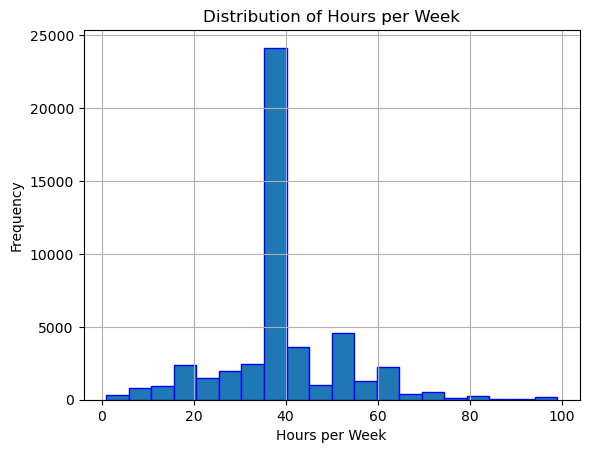

In [12]:
import matplotlib.pyplot as plt
df["hours-per-week"].hist(bins=20,edgecolor="blue")
plt.title("Distribution of Hours per Week")
plt.xlabel("Hours per Week")
plt.ylabel("Frequency")
plt.show()

In [13]:
skewness = df["hours-per-week"].skew()
print("Skewness:", skewness)

Skewness: 0.23874965720275756


In [14]:
import numpy as np
df["hours_log"] = np.log1p(df["hours-per-week"])

print(df["hours_log"])

0        3.713572
1        3.931826
2        3.713572
3        3.713572
4        3.433987
           ...   
48837    3.663562
48838    3.713572
48839    3.713572
48840    3.044522
48841    3.713572
Name: hours_log, Length: 48842, dtype: float64


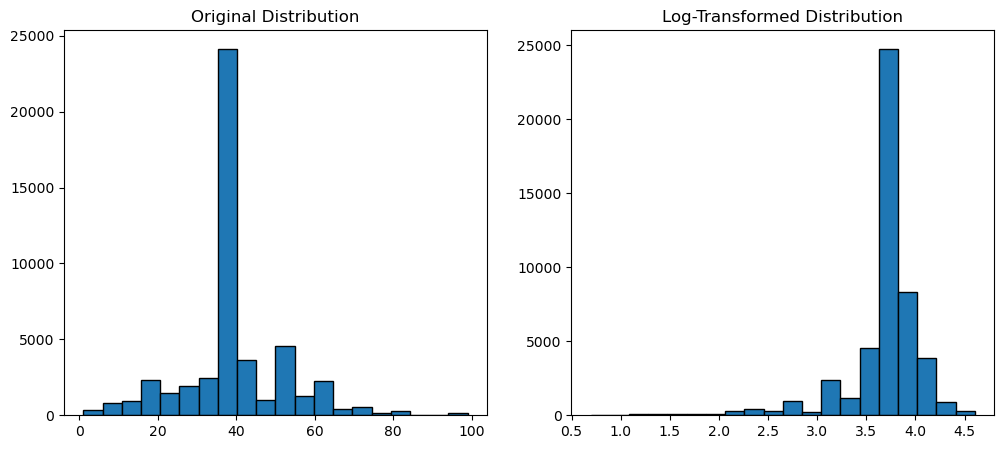

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(df["hours-per-week"], bins=20, edgecolor="black")
axes[0].set_title("Original Distribution")

axes[1].hist(df["hours_log"], bins=20, edgecolor="black")
axes[1].set_title("Log-Transformed Distribution")

plt.show()


In [16]:
#· Which individuals have the highest capital-gain and capital-loss?
highest_capital_gain = df.loc[df["capital-gain"].idxmax()]
print("Highest gain is",highest_capital_gain)
highest_capital_loss = df.loc[df["capital-loss"].idxmax()]
print("Highest loss is",highest_capital_loss)

Highest gain is age                                44
workclass                Self-emp-inc
fnlwgt                         223881
education                     HS-grad
educational-num                     9
marital-status     Married-civ-spouse
occupation               Craft-repair
relationship                  Husband
race                            White
gender                           Male
capital-gain                    99999
capital-loss                        0
hours-per-week                     50
native-country                      ?
income                           >50K
hours_log                    3.931826
Name: 83, dtype: object
Highest loss is age                           90
workclass                      ?
fnlwgt                     77053
education                HS-grad
educational-num                9
marital-status           Widowed
occupation                     ?
relationship       Not-in-family
race                       White
gender                    Female
capita

In [17]:
#Is fnlwgt column meaningful for prediction, or just a sampling weight?


In [18]:
#· What are the unique values and their counts in workclass?
unique_values = df["workclass"].unique()
print("Unique values in wrpkclass is",unique_values)

Unique values in wrpkclass is ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [19]:
unique_values_count = df["workclass"].nunique()
print("Unique values in wrpkclass is",unique_values_count)

Unique values in wrpkclass is 9


In [20]:
unique_values_counts = df["workclass"].value_counts()
print("Unique values in wrpkclass is",unique_values_counts)

Unique values in wrpkclass is workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [21]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Length: 48842, dtype: bool

In [22]:
#How is education distributed? Which education levels are most common?
education_distribution= df["education"].value_counts()
print("Education distribution is",education_distribution)

Education distribution is education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [23]:
education_percent = df["education"].value_counts(normalize = True)*100
print(education_percent)

education
HS-grad         32.316449
Some-college    22.271815
Bachelors       16.430531
Masters          5.439990
Assoc-voc        4.219729
11th             3.709922
Assoc-acdm       3.277917
10th             2.843864
7th-8th          1.955284
Prof-school      1.707547
9th              1.547848
12th             1.345154
Doctorate        1.216166
5th-6th          1.042136
1st-4th          0.505712
Preschool        0.169936
Name: proportion, dtype: float64


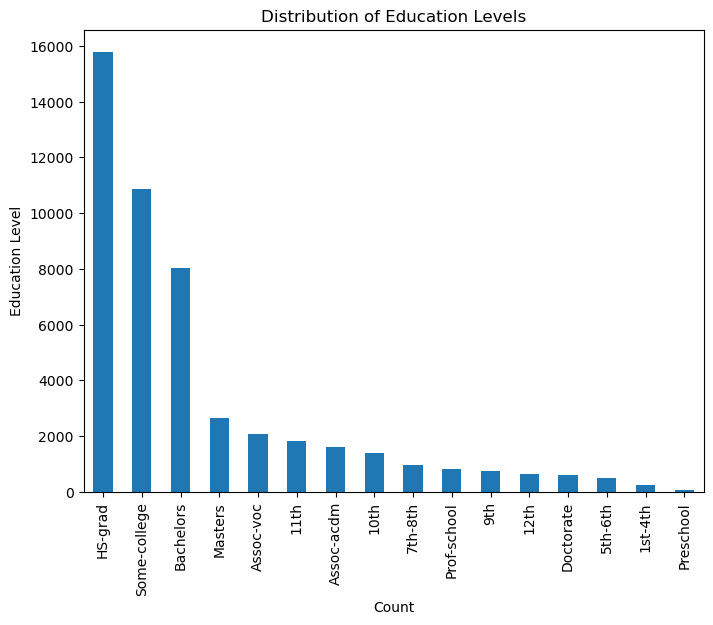

In [24]:
import matplotlib.pyplot as plt

df["education"].value_counts().plot(kind="bar", figsize=(8,6))
plt.title("Distribution of Education Levels")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.show()


In [25]:
#Does educational-num map properly to education categories (e.g., HS-grad → 9)?
mapping = df.groupby("education")["educational-num"].unique()
print(mapping)


education
10th             [6]
11th             [7]
12th             [8]
1st-4th          [2]
5th-6th          [3]
7th-8th          [4]
9th              [5]
Assoc-acdm      [12]
Assoc-voc       [11]
Bachelors       [13]
Doctorate       [16]
HS-grad          [9]
Masters         [14]
Preschool        [1]
Prof-school     [15]
Some-college    [10]
Name: educational-num, dtype: object


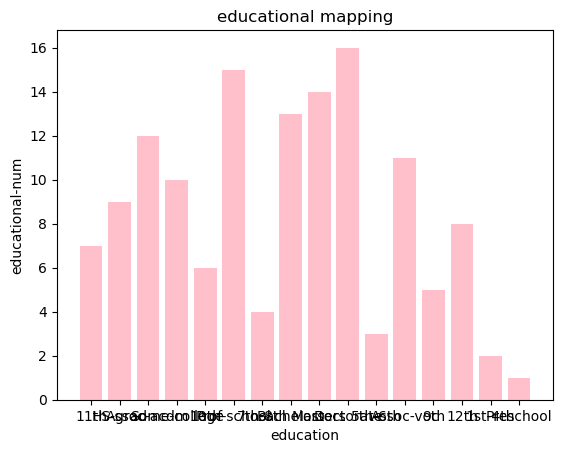

In [26]:
plt.bar(df["education"],df["educational-num"],color= "pink")
plt.title("educational mapping")
plt.xlabel("education")
plt.ylabel("educational-num")
plt.show()

In [29]:
#What are the common occupations (occupation) and how are they distributed?
occupation_counts = df["occupation"].value_counts(dropna= False)
print(occupation_counts)
occupation_percent= df["occupation"].value_counts(normalize= True)*100
print(occupation_percent)


occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64
occupation
Prof-specialty       12.636665
Craft-repair         12.513820
Exec-managerial      12.460587
Adm-clerical         11.488064
Sales                11.268990
Other-service        10.079440
Machine-op-inspct     6.187298
?                     5.751198
Transport-moving      4.821670
Handlers-cleaners     4.242251
Farming-fishing       3.050653
Tech-support          2.960567
Protective-serv       2.012612
Priv-house-serv       0.495475
Armed-Forces          0.030711
Name: proportion, dtype: float64


In [30]:
#How are marital statuses distributed in marital-status?
marital_status_distribution = df["marital-status"].value_counts()
print("Marital status distribution is",marital_status_distribution)

Marital status distribution is marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64


In [31]:
#What are the proportions of genders in the dataset?
# Counts
gender_counts = df["gender"].value_counts()

gender_percent = df["gender"].value_counts(normalize=True) * 100    # Proportions (percentages)

print("Counts:\n", gender_counts, "\n")
print("Proportions (%):\n", gender_percent)


Counts:
 gender
Male      32650
Female    16192
Name: count, dtype: int64 

Proportions (%):
 gender
Male      66.848204
Female    33.151796
Name: proportion, dtype: float64


In [32]:
#What is the race distribution in the dataset?
race_distribution = df["race"].value_counts()
print(race_distribution)

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64


In [33]:
#Which countries are represented in native-country, and which are most frequent?
represented_countries = df["native-country"].unique()
print("Countries in native-country are",represented_countries)

Countries in native-country are ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France' 'Holand-Netherlands']


In [34]:
country_count= df["native-country"].value_counts()
print("Most frequent countries are",country_count)

Most frequent countries are native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece               

In [35]:
#How does income (<=50K vs >50K) vary with education level?
pivot = pd.pivot_table(
    df,
    values="age",                     # any column (we just need counts, so can use 'age' or 'fnlwgt')
    index="education",                # rows
    columns="income",                 # columns
    aggfunc="count",                  # count occurrences
    fill_value=0
)

print(pivot)


income        <=50K  >50K
education                
10th           1302    87
11th           1720    92
12th            609    48
1st-4th         239     8
5th-6th         482    27
7th-8th         893    62
9th             715    41
Assoc-acdm     1188   413
Assoc-voc      1539   522
Bachelors      4712  3313
Doctorate       163   431
HS-grad       13281  2503
Masters        1198  1459
Preschool        82     1
Prof-school     217   617
Some-college   8815  2063


In [36]:
edu_income_counts = pd.crosstab(df["education"], df["income"])
print(edu_income_counts)


income        <=50K  >50K
education                
10th           1302    87
11th           1720    92
12th            609    48
1st-4th         239     8
5th-6th         482    27
7th-8th         893    62
9th             715    41
Assoc-acdm     1188   413
Assoc-voc      1539   522
Bachelors      4712  3313
Doctorate       163   431
HS-grad       13281  2503
Masters        1198  1459
Preschool        82     1
Prof-school     217   617
Some-college   8815  2063


In [37]:
#What is the relationship between age and income category?
age_by_income = df.groupby("income")["age"].describe()
print(age_by_income)


          count       mean        std   min   25%   50%   75%   max
income                                                             
<=50K   37155.0  36.872184  14.104118  17.0  25.0  34.0  46.0  90.0
>50K    11687.0  44.275178  10.558983  19.0  36.0  43.0  51.0  90.0


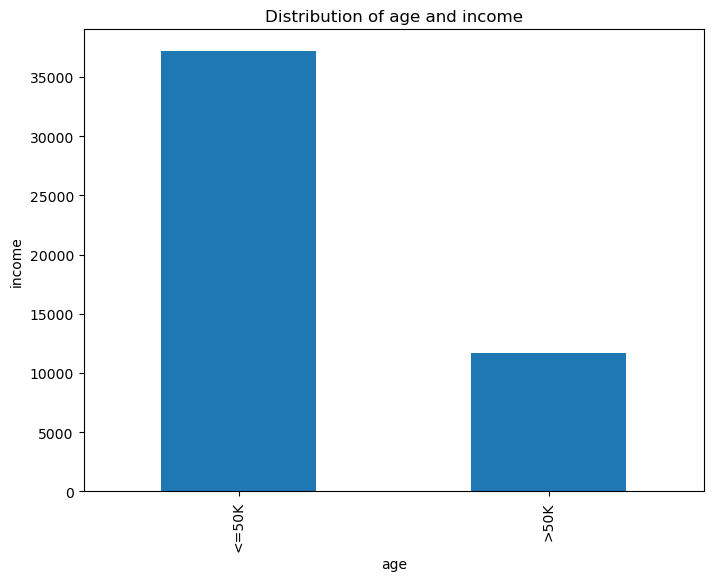

In [38]:

df["income"].value_counts().plot(kind="bar", figsize=(8,6))
plt.title("Distribution of age and income")
plt.xlabel("age")
plt.ylabel("income")
plt.show()


In [39]:
#Does gender affect income level distribution?
income_level = pd.crosstab(df["gender"],df["income"])
print(income_level)                           

income  <=50K  >50K
gender             
Female  14423  1769
Male    22732  9918


In [40]:
#How does race distribution differ across income categories?

race_income = pd.crosstab(df["race"], df["income"])
print(race_income)


income              <=50K   >50K
race                            
Amer-Indian-Eskimo    415     55
Asian-Pac-Islander   1110    409
Black                4119    566
Other                 356     50
White               31155  10607


In [41]:
##What is the effect of hours-per-week on income (>50K vs <=50K)?
hours_stats = df.groupby("income")["hours-per-week"].describe()
print(hours_stats)


          count       mean        std  min   25%   50%   75%   max
income                                                            
<=50K   37155.0  38.840048  12.356849  1.0  35.0  40.0  40.0  99.0
>50K    11687.0  45.452896  11.091176  1.0  40.0  40.0  50.0  99.0


In [42]:
#Does capital-gain strongly influence income prediction?
capital_gain = df["capital-gain"].value_counts().head()
print(capital_gain)

capital-gain
0        44807
15024      513
7688       410
7298       364
99999      244
Name: count, dtype: int64


In [43]:
#How many total observations (rows) and features (columns) are in the full dataset?
print(df.shape)

(48842, 16)


In [44]:
#What are the data types (e.g., integer, continuous, categorical/object) of each column
print(df.dtypes)

age                  int64
workclass           object
fnlwgt               int64
education           object
educational-num      int64
marital-status      object
occupation          object
relationship        object
race                object
gender              object
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country      object
income              object
hours_log          float64
dtype: object


In [45]:
#What is the distribution of the target variable, income? (i.e., What percentage of individuals earn >$50K versus ≤$50K?)
income_dist = df["income"].value_counts(normalize=True) * 100
print(income_dist)


income
<=50K    76.071823
>50K     23.928177
Name: proportion, dtype: float64


In [46]:
#What are the minimum, maximum, mean, and median values for the numerical columns like age, fnlwgt, capital-gain, capital-loss, and hours-per-week?
num_cols = ["age", "fnlwgt", "capital-gain", "capital-loss", "hours-per-week"]

summary = df[num_cols].agg(["min", "max", "mean", "median"])
print(summary)


              age        fnlwgt  capital-gain  capital-loss  hours-per-week
min     17.000000  1.228500e+04      0.000000      0.000000        1.000000
max     90.000000  1.490400e+06  99999.000000   4356.000000       99.000000
mean    38.643585  1.896641e+05   1079.067626     87.502314       40.422382
median  37.000000  1.781445e+05      0.000000      0.000000       40.000000


In [47]:
def detect_outlier(data):
    Q1 = np.percentile(data,25)
    print("First Quantifier",Q1)
    Q3 = np.percentile(data,75)
    print("3rd Quantifier",Q3)
    IQR = Q3-Q1
    print(IQR)
    lower_bound = Q1 -1.5*IQR
    upper_bound = Q3+ 1.5*IQR
    print("Lower_bound",lower_bound)
    print("upper_bound",upper_bound)
    outlier = [x for x in data if x < lower_bound or x> upper_bound]
    return outlier,lower_bound,upper_bound

In [48]:
#Are there any potential outliers in the continuous numerical features (e.g., very high capital-gain or very low/high hours-per-week)?
outliers, lower, upper = detect_outlier(df["capital-gain"])

print("Outliers:", outliers[:10])   # show first 10 outliers
print("Number of outliers:", len(outliers))


First Quantifier 0.0
3rd Quantifier 0.0
0.0
Lower_bound 0.0
upper_bound 0.0
Outliers: [7688, 3103, 6418, 3103, 7298, 7688, 3908, 14084, 3103, 5178]
Number of outliers: 4035


Text(0, 0.5, 'capital-gain')

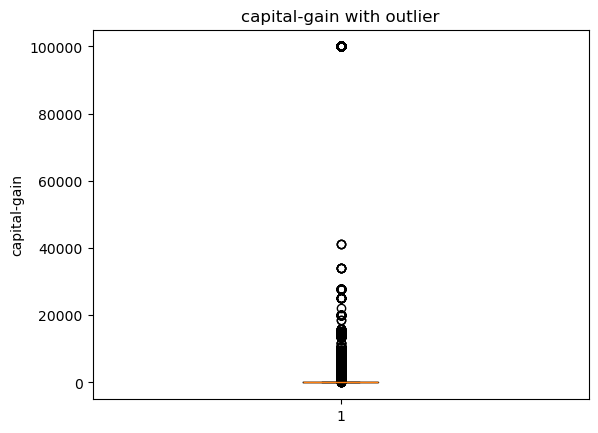

In [49]:
import matplotlib.pyplot as plt
plt.boxplot(df["capital-gain"])
plt.title("capital-gain with outlier")
plt.ylabel("capital-gain")

In [50]:
#remove outliers
Q1= df["capital-gain"].quantile(0.25)
Q3 = df["capital-gain"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5* IQR
df_no_outliers = df[(df["capital-gain"] >= lower) & (df["capital-gain"]<= upper)]
print(df_no_outliers)

       age  workclass  fnlwgt     education  educational-num  \
0       25    Private  226802          11th                7   
1       38    Private   89814       HS-grad                9   
2       28  Local-gov  336951    Assoc-acdm               12   
4       18          ?  103497  Some-college               10   
5       34    Private  198693          10th                6   
...    ...        ...     ...           ...              ...   
48836   22    Private  310152  Some-college               10   
48837   27    Private  257302    Assoc-acdm               12   
48838   40    Private  154374       HS-grad                9   
48839   58    Private  151910       HS-grad                9   
48840   22    Private  201490       HS-grad                9   

           marital-status         occupation   relationship   race  gender  \
0           Never-married  Machine-op-inspct      Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing        Husband  White    Male 

{'whiskers': [<matplotlib.lines.Line2D at 0x1b73c924690>,
 'caps': [<matplotlib.lines.Line2D at 0x1b73c924910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b73c924550>],
 'medians': [<matplotlib.lines.Line2D at 0x1b73c924b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b73c924cd0>],
 'means': []}

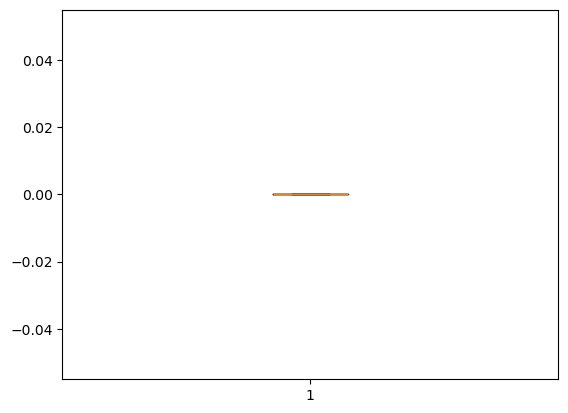

In [51]:
plt.boxplot(df_no_outliers["capital-gain"])

In [52]:
outliers, lower, upper = detect_outlier(df["hours-per-week"])

print("Outliers:", outliers[:10])   # show first 10 outliers
print("Number of outliers:", len(outliers))


First Quantifier 40.0
3rd Quantifier 45.0
5.0
Lower_bound 32.5
upper_bound 52.5
Outliers: [30, 30, 32, 10, 25, 30, 20, 6, 90, 20]
Number of outliers: 13496


Text(0, 0.5, 'hours-per-week')

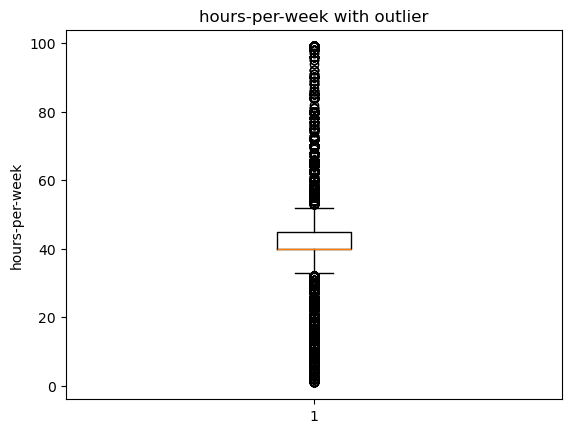

In [53]:
import matplotlib.pyplot as plt
plt.boxplot(df["hours-per-week"])
plt.title("hours-per-week with outlier")
plt.ylabel("hours-per-week")

In [54]:
#remove outliers
Q1= df["hours-per-week"].quantile(0.25)
Q3 = df["hours-per-week"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5* IQR
df_no_outliers = df[(df["hours-per-week"] >= lower) & (df["hours-per-week"]<= upper)]
print(df_no_outliers)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
6       29             ?  227026       HS-grad                9   
...    ...           ...     ...           ...              ...   
48836   22       Private  310152  Some-college               10   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation   relationship   race  gender  \
0           Never-married  Machine-op-inspct      Own-child  Black    Male   
1      Married-civ-spouse    Farming-fi

{'whiskers': [<matplotlib.lines.Line2D at 0x1b73c9be350>,
 'caps': [<matplotlib.lines.Line2D at 0x1b73c9be5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b73c9be210>],
 'medians': [<matplotlib.lines.Line2D at 0x1b73c9be850>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b73c9be990>],
 'means': []}

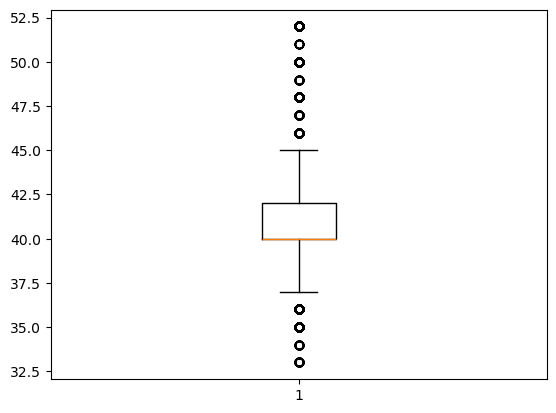

In [55]:
plt.boxplot(df_no_outliers["hours-per-week"])

In [56]:
#For the categorical features (workclass, education, marital-status, occupation, relationship, race, gender, native-country), what are the top 5 most frequent categories in each column?
categorical_columns = ["workclass","education","marital-status","occupation","relationship","race","gender","native-country"]
for col in categorical_columns:
    print(f"\nTOP 5 categories in '{col}':")
    print(df[col].value_counts().head())


TOP 5 categories in 'workclass':
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Name: count, dtype: int64

TOP 5 categories in 'education':
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
Name: count, dtype: int64

TOP 5 categories in 'marital-status':
marital-status
Married-civ-spouse    22379
Never-married         16117
Divorced               6633
Separated              1530
Widowed                1518
Name: count, dtype: int64

TOP 5 categories in 'occupation':
occupation
Prof-specialty     6172
Craft-repair       6112
Exec-managerial    6086
Adm-clerical       5611
Sales              5504
Name: count, dtype: int64

TOP 5 categories in 'relationship':
relationship
Husband          19716
Not-in-family    12583
Own-child         7581
Unmarried         5125
Wife              2331
Name: count, dtype: int64

TOP 5 categories

In [57]:
#How many unique categories are there in the high-cardinality feature native-country?
unique_count = df["native-country"].nunique()
print("Unique categories in native-country:",unique_count)
print(df["native-country"].unique())


Unique categories in native-country: 42
['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France' 'Holand-Netherlands']


In [58]:
#How does education level (e.g., 'Bachelors' vs 'HS-grad') relate to the individual's income?
education_on_income = df.groupby("education")["income"].value_counts(normalize = True).unstack()
print("Education level related to individual income is :",education_on_income)

Education level related to individual income is : income           <=50K      >50K
education                       
10th          0.937365  0.062635
11th          0.949227  0.050773
12th          0.926941  0.073059
1st-4th       0.967611  0.032389
5th-6th       0.946955  0.053045
7th-8th       0.935079  0.064921
9th           0.945767  0.054233
Assoc-acdm    0.742036  0.257964
Assoc-voc     0.746725  0.253275
Bachelors     0.587165  0.412835
Doctorate     0.274411  0.725589
HS-grad       0.841422  0.158578
Masters       0.450884  0.549116
Preschool     0.987952  0.012048
Prof-school   0.260192  0.739808
Some-college  0.810351  0.189649


In [59]:
#sorting by high income share 
education_on_income = education_on_income.sort_values(by=">50K", ascending=False)
print("High income sshare:",education_on_income)

High income sshare: income           <=50K      >50K
education                       
Prof-school   0.260192  0.739808
Doctorate     0.274411  0.725589
Masters       0.450884  0.549116
Bachelors     0.587165  0.412835
Assoc-acdm    0.742036  0.257964
Assoc-voc     0.746725  0.253275
Some-college  0.810351  0.189649
HS-grad       0.841422  0.158578
12th          0.926941  0.073059
7th-8th       0.935079  0.064921
10th          0.937365  0.062635
9th           0.945767  0.054233
5th-6th       0.946955  0.053045
11th          0.949227  0.050773
1st-4th       0.967611  0.032389
Preschool     0.987952  0.012048


In [60]:
#What is the average age for people in the >$50K income group compared to the ≤$50K group?
average_age_per_indivudual = df.groupby("income")["age"].mean()
print("Average age of people according to income:",average_age_per_indivudual)

Average age of people according to income: income
<=50K    36.872184
>50K     44.275178
Name: age, dtype: float64


In [61]:
#Is there a difference in the distribuation of hours-per-week worked between the >$50K and ≤$50K income groups?
difference = df.groupby("income")["hours-per-week"].agg(["mean", "median"])
print(difference)

             mean  median
income                   
<=50K   38.840048    40.0
>50K    45.452896    40.0


In [62]:
#Which occupation categories have the highest proportion of individuals earning >$50K?
occupation_income = (
    df.groupby("occupation")["income"]
      .value_counts(normalize=True)   # proportion within each occupation
      .unstack()
      .fillna(0)                      # handle missing categories
)
occupation_income = occupation_income.sort_values(by=">50K", ascending=False)
print(occupation_income.head(10))


income                <=50K      >50K
occupation                           
Exec-managerial    0.522182  0.477818
Prof-specialty     0.548931  0.451069
Armed-Forces       0.666667  0.333333
Protective-serv    0.686673  0.313327
Tech-support       0.709544  0.290456
Sales              0.732013  0.267987
Craft-repair       0.773724  0.226276
Transport-moving   0.795754  0.204246
Adm-clerical       0.863126  0.136874
Machine-op-inspct  0.876903  0.123097


In [63]:
#How does the gender distribution vary across different workclass types
gender_workclass = (
    df.groupby("workclass")["gender"]
      .value_counts(normalize=True)   # proportions within workclass
      .unstack()
      .fillna(0)
)

print(gender_workclass.head())


gender          Female      Male
workclass                       
?             0.453733  0.546267
Federal-gov   0.315642  0.684358
Local-gov     0.401148  0.598852
Never-worked  0.300000  0.700000
Private       0.342093  0.657907


In [64]:
#data cleaning questions


In [65]:
#Which columns contain missing values (represented by '?') and what is the exact count or percentage of missing values in each of those columns (workclass, occupation, native-country)?
missing_count = {
    col:(df[col]== "?").sum()
    for col in ["workclass", "occupation", "native-country"]
}
print("Missing count for these columns is:",missing_count)
    #to get percentage

missing_percent = {
    col:(df[col]== "?").mean()*100
    for col in ["workclass", "occupation", "native-country"]
}
print("Missing percentage for these coulmns is :",missing_percent)

Missing count for these columns is: {'workclass': np.int64(2799), 'occupation': np.int64(2809), 'native-country': np.int64(857)}
Missing percentage for these coulmns is : {'workclass': np.float64(5.7307235575938735), 'occupation': np.float64(5.751197739650301), 'native-country': np.float64(1.7546374022357807)}


In [66]:
#Should the missing values in categorical columns like workclass and occupation be imputed with the mode, a generic category ('Unknown'), or dropped, and what justification supports that choice?
df = df.replace("?",np.nan)
df["workclass"] = df["workclass"].fillna("unknown")
df["occupation"] = df["occupation"].fillna("unknown")
df["native-country"] = df["native-country"].fillna(df["native-country"].mode()[0])
print(df["workclass"])
print(df["occupation"])
print(df["native-country"])
print(df[["workclass", "occupation", "native-country"]].isnull().sum())

0             Private
1             Private
2           Local-gov
3             Private
4             unknown
             ...     
48837         Private
48838         Private
48839         Private
48840         Private
48841    Self-emp-inc
Name: workclass, Length: 48842, dtype: object
0        Machine-op-inspct
1          Farming-fishing
2          Protective-serv
3        Machine-op-inspct
4                  unknown
               ...        
48837         Tech-support
48838    Machine-op-inspct
48839         Adm-clerical
48840         Adm-clerical
48841      Exec-managerial
Name: occupation, Length: 48842, dtype: object
0        United-States
1        United-States
2        United-States
3        United-States
4        United-States
             ...      
48837    United-States
48838    United-States
48839    United-States
48840    United-States
48841    United-States
Name: native-country, Length: 48842, dtype: object
workclass         0
occupation        0
native-country    0
dtyp

In [67]:
#Are there any inconsistencies in the naming or formatting of categories (e.g., are 'United-States' and 'United States' considered the same in the full dataset for native-country)?
#getting unique categories first
for col in ["workclass", "occupation", "native-country"]:
    print(f"\nUnique values in {col}:")
    print(sorted(df[col].unique()))
inconsistencies = df["native-country"].str.strip().value_counts().head(10) #formatting inconsistencies
print("Inconsistencies:",inconsistencies)



Unique values in workclass:
['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay', 'unknown']

Unique values in occupation:
['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving', 'unknown']

Unique values in native-country:
['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia']
Inconsistencies: na

In [58]:
#now normalizing categories(inconsistences)
df["native-country"]= df["native-country"].str.strip()
df["native-country"]= df["native-country"].replace({       #for dic{} use only .replace  str.replace is used with string\regex
    "United States": "United-States"

})
print(df["native-country"])


0        United-States
1        United-States
2        United-States
3        United-States
4        United-States
             ...      
48837    United-States
48838    United-States
48839    United-States
48840    United-States
48841    United-States
Name: native-country, Length: 48842, dtype: object


In [66]:
#Do the numerical columns contain any infeasible zero values (e.g., a person with age 0) or values that are clearly used as placeholders for missing data (e.g., capital-gain=99999)?
df["age"].describe()
age= (df["age"]<=0).sum()
print("Infeasible zero in age:",age)
capital_gain_loss = (df[["capital-gain","capital-loss"]]==0).sum()
print("Infeasible zero in capital gain or loss:",capital_gain_loss)
hours_per_week=(df["hours-per-week"] == 0).sum()
print("infeasible zero in hours-per-week:",hours_per_week)

Infeasible zero in age: 0
Infeasible zero in capital gain or loss: capital-gain    44807
capital-loss    46560
dtype: int64
infeasible zero in hours-per-week: 0


In [68]:
# Are there missing values in the dataset?
df.isnull()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,hours_log
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [71]:
df.isnull().sum().head()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
dtype: int64

In [73]:
#How are missing values represented (e.g., "?", "NaN", blanks)

replace = df.replace("?", pd.NA, inplace=False)   # Convert '?' to Nan
print(replace)
print(df.isna().sum())   ## Verify


       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18       unknown  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishin

In [74]:
#How many rows have missing values in workclass and occupation?
missing_rows = df[(df["workclass"] == "?") | (df["occupation"] == "?")]   #If missing values are still "?"
print("Number of rows with missing workclass or occupation:", len(missing_rows))


Number of rows with missing workclass or occupation: 0


In [75]:
missing_rows = df[df["workclass"].isna() | df["occupation"].isna()]  #2. If you already converted "?" → NaN
print("Number of rows with missing workclass or occupation:", len(missing_rows))


Number of rows with missing workclass or occupation: 0


In [76]:
#Should we drop rows with "?" values, or replace them with "Unknown"?
df_cleaned = df[(df["workclass"] != "?") & (df["occupation"] != "?")]
print(df_cleaned)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18       unknown  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishin

In [77]:
df["workclass"] = df["workclass"].replace("?", "Unknown")   #Replace "?" with "Unknown"
df["occupation"] = df["occupation"].replace("?", "Unknown")
print(df[["workclass","occupation"]])

          workclass         occupation
0           Private  Machine-op-inspct
1           Private    Farming-fishing
2         Local-gov    Protective-serv
3           Private  Machine-op-inspct
4           unknown            unknown
...             ...                ...
48837       Private       Tech-support
48838       Private  Machine-op-inspct
48839       Private       Adm-clerical
48840       Private       Adm-clerical
48841  Self-emp-inc    Exec-managerial

[48842 rows x 2 columns]


In [78]:
#Are there duplicate rows? If so, how many, and should we drop them?
# Count duplicate rows
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 52


In [79]:
df.shape

(48842, 16)

In [81]:
df = df.drop_duplicates()
new_rows = df.shape
print(new_rows)

(48790, 16)


In [82]:
#Are all categorical values consistent (e.g., "United-States" vs "United States")?
categorical_cols = ["workclass", "education", "marital-status",
                    "occupation", "relationship", "race", "gender", "native-country"]

for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(sorted(df[col].unique()))



Unique values in workclass:
['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay', 'unknown']

Unique values in education:
['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']

Unique values in marital-status:
['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']

Unique values in occupation:
['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving', 'unknown']

Unique values in relationship:
['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife']

Unique values in race:
['Amer-Indian-Eskimo', 'Asian-Pac-Islander', '

In [83]:
#alternative method
for col in categorical_cols:
    cleaned = df[col].str.strip().str.lower().unique()
    print(f"\nNormalized unique values in {col}:")
    print(sorted(cleaned))




Normalized unique values in workclass:
['federal-gov', 'local-gov', 'never-worked', 'private', 'self-emp-inc', 'self-emp-not-inc', 'state-gov', 'unknown', 'without-pay']

Normalized unique values in education:
['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'assoc-acdm', 'assoc-voc', 'bachelors', 'doctorate', 'hs-grad', 'masters', 'preschool', 'prof-school', 'some-college']

Normalized unique values in marital-status:
['divorced', 'married-af-spouse', 'married-civ-spouse', 'married-spouse-absent', 'never-married', 'separated', 'widowed']

Normalized unique values in occupation:
['adm-clerical', 'armed-forces', 'craft-repair', 'exec-managerial', 'farming-fishing', 'handlers-cleaners', 'machine-op-inspct', 'other-service', 'priv-house-serv', 'prof-specialty', 'protective-serv', 'sales', 'tech-support', 'transport-moving', 'unknown']

Normalized unique values in relationship:
['husband', 'not-in-family', 'other-relative', 'own-child', 'unmarried', 'wife']

Normalized uni

In [86]:
#for multiple outliers
import pandas as pd

def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers


In [87]:
#Are there any outliers in numerical columns (age, hours-per-week, capital-gain, capital-loss)?
numeric_cols = ["age", "hours-per-week", "capital-gain", "capital-loss"]

for col in numeric_cols:
    outliers = detect_outliers(df[col])
    print(f"{col}: {len(outliers)} outliers")
    print(f"Examples: {outliers.unique()[:10]}\n")


age: 215 outliers
Examples: [79 80 90 81 82 83 85 84 89 88]

hours-per-week: 13486 outliers
Examples: [30 32 10 25 20  6 90 54 60 18]

capital-gain: 4035 outliers
Examples: [ 7688  3103  6418  7298  3908 14084  5178 15024 99999  2597]

capital-loss: 2282 outliers
Examples: [1721 1876 2415 1887  625 1977 2057 1429 1590 1485]



In [89]:
#Are all ages realistic (e.g., >0, <100)?
print(df["age"].describe())
unrealistic_ages = df[(df["age"] <= 0) | (df["age"] >= 100)]
print("Number of unrealistic ages:", len(unrealistic_ages))
print(unrealistic_ages)


count    48790.000000
mean        38.652798
std         13.708493
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64
Number of unrealistic ages: 0
Empty DataFrame
Columns: [age, workclass, fnlwgt, education, educational-num, marital-status, occupation, relationship, race, gender, capital-gain, capital-loss, hours-per-week, native-country, income, hours_log]
Index: []


In [90]:
#Should we treat fnlwgt column as relevant, or remove it since it may not help modeling?
df = df.drop(columns=["fnlwgt"])
print(df)

       age     workclass     education  educational-num      marital-status  \
0       25       Private          11th                7       Never-married   
1       38       Private       HS-grad                9  Married-civ-spouse   
2       28     Local-gov    Assoc-acdm               12  Married-civ-spouse   
3       44       Private  Some-college               10  Married-civ-spouse   
4       18       unknown  Some-college               10       Never-married   
...    ...           ...           ...              ...                 ...   
48837   27       Private    Assoc-acdm               12  Married-civ-spouse   
48838   40       Private       HS-grad                9  Married-civ-spouse   
48839   58       Private       HS-grad                9             Widowed   
48840   22       Private       HS-grad                9       Never-married   
48841   52  Self-emp-inc       HS-grad                9  Married-civ-spouse   

              occupation relationship   race  gende

In [91]:
#Are there spelling inconsistencies in categorical data (e.g., Self-emp-not-inc vs Self-emp-inc)?
categorical_cols = ["workclass", "education", "marital-status",
                    "occupation", "relationship", "race", "gender", "native-country"]

for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(sorted(df[col].unique()))



Unique values in workclass:
['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay', 'unknown']

Unique values in education:
['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']

Unique values in marital-status:
['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']

Unique values in occupation:
['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving', 'unknown']

Unique values in relationship:
['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife']

Unique values in race:
['Amer-Indian-Eskimo', 'Asian-Pac-Islander', '

In [ ]:
#Data Transformation

In [93]:
#How can categorical variables (like workclass, education, occupation) be encoded — label encoding or one-hot encoding?
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["workclass_encoded"] = le.fit_transform(df["workclass"])
print(df["workclass_encoded"])


0        3
1        3
2        1
3        3
4        8
        ..
48837    3
48838    3
48839    3
48840    3
48841    4
Name: workclass_encoded, Length: 48790, dtype: int64


In [94]:
df_encoded = pd.get_dummies(df, columns=['workclass', 'occupation'], drop_first=True)  
print(df_encoded)

       age     education  educational-num      marital-status relationship  \
0       25          11th                7       Never-married    Own-child   
1       38       HS-grad                9  Married-civ-spouse      Husband   
2       28    Assoc-acdm               12  Married-civ-spouse      Husband   
3       44  Some-college               10  Married-civ-spouse      Husband   
4       18  Some-college               10       Never-married    Own-child   
...    ...           ...              ...                 ...          ...   
48837   27    Assoc-acdm               12  Married-civ-spouse         Wife   
48838   40       HS-grad                9  Married-civ-spouse      Husband   
48839   58       HS-grad                9             Widowed    Unmarried   
48840   22       HS-grad                9       Never-married    Own-child   
48841   52       HS-grad                9  Married-civ-spouse         Wife   

        race  gender  capital-gain  capital-loss  hours-per-wee

In [107]:
#Should we convert gender to binary (0 = Male, 1 = Female) or keep categorical?
import pandas as pd
df2 = pd.DataFrame({'gender': ['Male', 'Female', 'Female', 'Male']})
df2['gender_binary'] = df2['gender'].map({'Male': 0, 'Female': 1})

print(df2)


   gender  gender_binary
0    Male              0
1  Female              1
2  Female              1
3    Male              0


In [104]:
#Should we group rare native-country values into an “Other” category?


df1 = pd.DataFrame({
    'native-country': ['United-States', 'India', 'Mexico', 'Canada', 'India', 'Peru', 'Germany', 'India']
})
freq = df1['native-country'].value_counts(normalize=True)
rare_countries = freq[freq < 0.2].index
df1['native-country-grouped'] = df1['native-country'].replace(rare_countries, 'Other')   # Replace rare countries with 'Other

print(df)


  native-country native-country-grouped
0  United-States                  Other
1          India                  India
2         Mexico                  Other
3         Canada                  Other
4          India                  India
5           Peru                  Other
6        Germany                  Other
7          India                  India


In [69]:
#Should we transform education into educational-num for modeling and drop one of them?
df_model = df.drop("education", axis=1,inplace = False)
print(df_model)


       age     workclass  fnlwgt  educational-num      marital-status  \
0       25       Private  226802                7       Never-married   
1       38       Private   89814                9  Married-civ-spouse   
2       28     Local-gov  336951               12  Married-civ-spouse   
3       44       Private  160323               10  Married-civ-spouse   
4       18       unknown  103497               10       Never-married   
...    ...           ...     ...              ...                 ...   
48837   27       Private  257302               12  Married-civ-spouse   
48838   40       Private  154374                9  Married-civ-spouse   
48839   58       Private  151910                9             Widowed   
48840   22       Private  201490                9       Never-married   
48841   52  Self-emp-inc  287927                9  Married-civ-spouse   

              occupation relationship   race  gender  capital-gain  \
0      Machine-op-inspct    Own-child  Black    Male 

In [8]:
#Can we create new features, such as age groups (young, middle-aged, senior)

df = pd.DataFrame({
    "age": np.random.randint(0, 100, size=10_000_000)
})
# Create age groups with pd.cut (vectorized)
bins = [0, 24, 54, 100]
labels = ["Young", "Middle-aged", "Senior"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels)
print(df["age_group"])


0                Young
1          Middle-aged
2               Senior
3               Senior
4               Senior
              ...     
9999995    Middle-aged
9999996         Senior
9999997    Middle-aged
9999998         Senior
9999999    Middle-aged
Name: age_group, Length: 10000000, dtype: category
Categories (3, object): ['Young' < 'Middle-aged' < 'Senior']


In [9]:
#Can we create a binary variable for capital-gain/loss presence instead of raw values (e.g., 0 = no gain, 1 = has gain)?
df= pd.DataFrame({
    "capital_gain": [0, 5000, 0, 200, 0],
    "capital_loss": [0, 0, 1500, 0, 0]
})

# Create binary columns
df["has_capital_gain"] = (df["capital_gain"] > 0).astype(int)
df["has_capital_loss"] = (df["capital_loss"] > 0).astype(int)

print(df)


   capital_gain  capital_loss  has_capital_gain  has_capital_loss
0             0             0                 0                 0
1          5000             0                 1                 0
2             0          1500                 0                 1
3           200             0                 1                 0
4             0             0                 0                 0


In [12]:
#Should we scale numerical columns (age, hours-per-week, capital-gain, capital-loss) using normalization or standardization?
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\amnaj\Downloads\adult.csv")
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["age", "hours-per-week", "capital-gain", "capital-loss"]] = scaler.fit_transform(
    df[["age", "hours-per-week", "capital-gain", "capital-loss"]]
)
print(df[["age", "hours-per-week", "capital-gain", "capital-loss"]])

            age  hours-per-week  capital-gain  capital-loss
0     -0.995129       -0.034087     -0.144804     -0.217127
1     -0.046942        0.772930     -0.144804     -0.217127
2     -0.776316       -0.034087     -0.144804     -0.217127
3      0.390683       -0.034087      0.886874     -0.217127
4     -1.505691       -0.841104     -0.144804     -0.217127
...         ...             ...           ...           ...
48837 -0.849254       -0.195490     -0.144804     -0.217127
48838  0.098933       -0.034087     -0.144804     -0.217127
48839  1.411808       -0.034087     -0.144804     -0.217127
48840 -1.213941       -1.648120     -0.144804     -0.217127
48841  0.974183       -0.034087      1.871315     -0.217127

[48842 rows x 4 columns]


In [17]:
#What is the most appropriate encoding technique for each categorical column (e.g., One-Hot Encoding for workclass and marital-status, or Target Encoding for native-country)?
df = pd.read_csv(r"C:\Users\amnaj\Downloads\adult.csv")
low_card_encoding =["workclass","marital-status","relationship","race","gender"]
df= pd.get_dummies(df,columns=low_card_encoding,drop_first=True)
print(df)

       age  fnlwgt     education  educational-num         occupation  \
0       25  226802          11th                7  Machine-op-inspct   
1       38   89814       HS-grad                9    Farming-fishing   
2       28  336951    Assoc-acdm               12    Protective-serv   
3       44  160323  Some-college               10  Machine-op-inspct   
4       18  103497  Some-college               10                  ?   
...    ...     ...           ...              ...                ...   
48837   27  257302    Assoc-acdm               12       Tech-support   
48838   40  154374       HS-grad                9  Machine-op-inspct   
48839   58  151910       HS-grad                9       Adm-clerical   
48840   22  201490       HS-grad                9       Adm-clerical   
48841   52  287927       HS-grad                9    Exec-managerial   

       capital-gain  capital-loss  hours-per-week native-country income  ...  \
0                 0             0              40  Unit

In [19]:
#How should the high-cardinality feature native-country be handled? (e.g., group all non-USA countries into a single 'Other' category to reduce dimensionality)

top_countries = df["native-country"]  # Only keep the most frequent country, rest as 'Other'

df['native-country'] = df['native-country'].apply(lambda x: x if x in top_countries else 'Other')
print(df['native-country'])


0        Other
1        Other
2        Other
3        Other
4        Other
         ...  
48837    Other
48838    Other
48839    Other
48840    Other
48841    Other
Name: native-country, Length: 48842, dtype: object


In [22]:
df = pd.get_dummies(df, columns=["native-country"], drop_first=True)
print(df)

KeyError: "None of [Index(['native-country'], dtype='object')] are in the [columns]"

In [23]:
#Should the numerical features (e.g., age, hours-per-week) be scaled (e.g., using StandardScaler or MinMaxScaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'hours-per-week']] = scaler.fit_transform(df[['age', 'hours-per-week']])
print(df[['age', 'hours-per-week']])


            age  hours-per-week
0     -0.995129       -0.034087
1     -0.046942        0.772930
2     -0.776316       -0.034087
3      0.390683       -0.034087
4     -1.505691       -0.841104
...         ...             ...
48837 -0.849254       -0.195490
48838  0.098933       -0.034087
48839  1.411808       -0.034087
48840 -1.213941       -1.648120
48841  0.974183       -0.034087

[48842 rows x 2 columns]


In [24]:
#Can an ordinal encoding be applied to the education column, mapping the educational categories to a proper numerical scale (e.g., 'Preschool'=1, 'Bachelors'=13, 'Doctorate'=16) instead of using the existing education-num?
edu_order = {
    'Preschool': 1,
    '1st-4th': 2,
    '5th-6th': 3,
    '7th-8th': 4,
    '9th': 5,
    '10th': 6,
    '11th': 7,
    '12th': 8,
    'HS-grad': 9,
    'Some-college': 10,
    'Assoc-voc': 11,
    'Assoc-acdm': 12,
    'Bachelors': 13,
    'Masters': 14,
    'Prof-school': 15,
    'Doctorate': 16
}

df['education_num'] = df['education'].map(edu_order)
print(df['education_num'])

0         7
1         9
2        12
3        10
4        10
         ..
48837    12
48838     9
48839     9
48840     9
48841     9
Name: education_num, Length: 48842, dtype: int64


In [25]:
#Should new features be engineered, such as a capital-diff feature (capital-gain - capital-loss) or an is-married binary flag derived from the marital-status column?
df['capital_diff'] = df['capital-gain'] - df['capital-loss']
print(df['capital_diff'])

0            0
1            0
2            0
3         7688
4            0
         ...  
48837        0
48838        0
48839        0
48840        0
48841    15024
Name: capital_diff, Length: 48842, dtype: int64


In [4]:
#an is-married binary flag derived from the marital-status column
df = pd.read_csv(r"C:\Users\amnaj\Downloads\adult.csv")
df['is_married'] = df["marital-status"].apply(lambda x: 1 if 'Married' in x else 0)
print(df[["marital-status", 'is_married']].head())


       marital-status  is_married
0       Never-married           0
1  Married-civ-spouse           1
2  Married-civ-spouse           1
3  Married-civ-spouse           1
4       Never-married           0


In [5]:
Visulaization

NameError: name 'Visulaization' is not defined

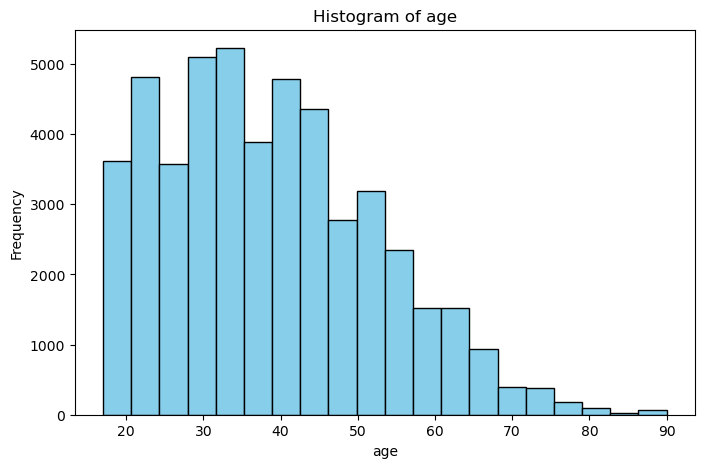

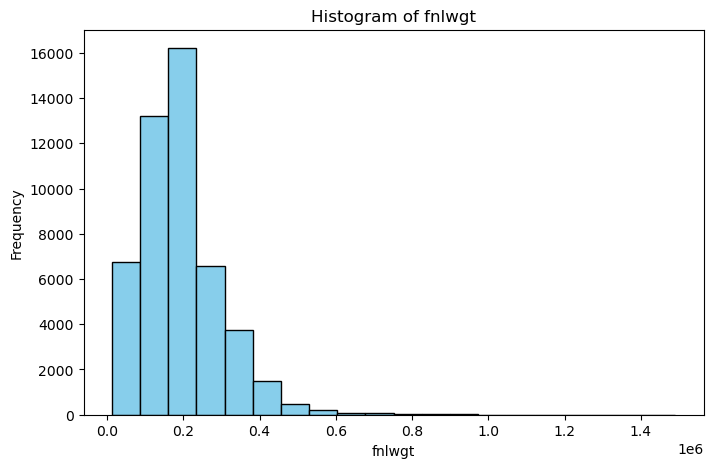

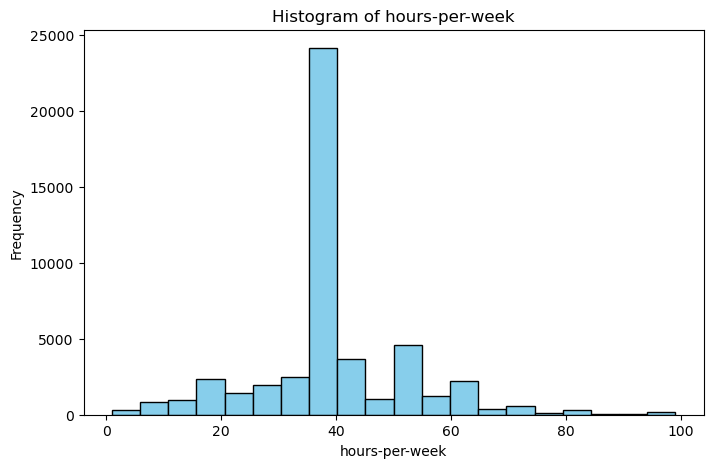

In [6]:
#Numerical (age, fnlwgt, hours-per-week) Histogram To visualize the distribution shape, central tendency, and spread
import pandas as pd
import matplotlib.pyplot as plt

# Example: assuming your dataframe is called df
numerical_columns = ['age', 'fnlwgt', 'hours-per-week']

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


C:\Users\amnaj\AppData\Local\Temp\ipykernel_4964\1446975896.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col] for col in numerical_columns], labels=numerical_columns)


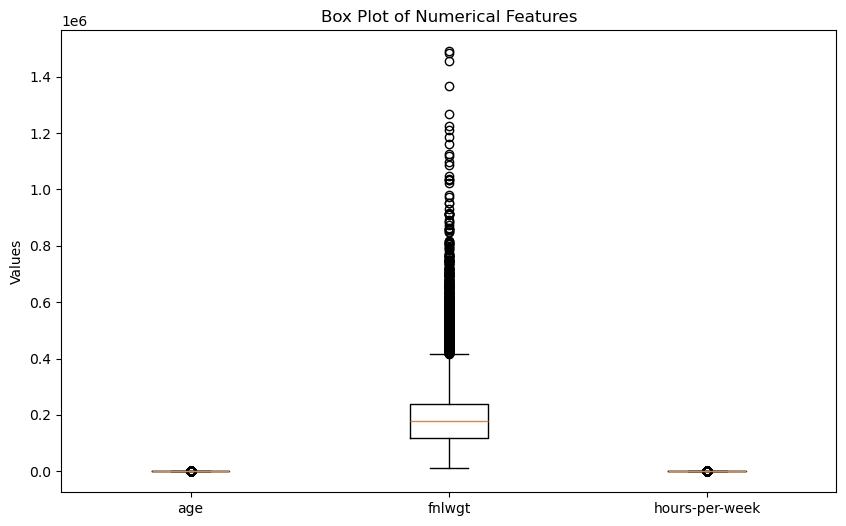

In [33]:
#Numerical (age, fnlwgt,hours-per-week) Box Plot To identify potential outliers and visualize quartiles and range.
import matplotlib.pyplot as plt

numerical_columns = ['age', 'fnlwgt', 'hours-per-week']

plt.figure(figsize=(10, 6))
plt.boxplot([df[col] for col in numerical_columns], labels=numerical_columns)
plt.title('Box Plot of Numerical Features')
plt.ylabel('Values')
plt.show()


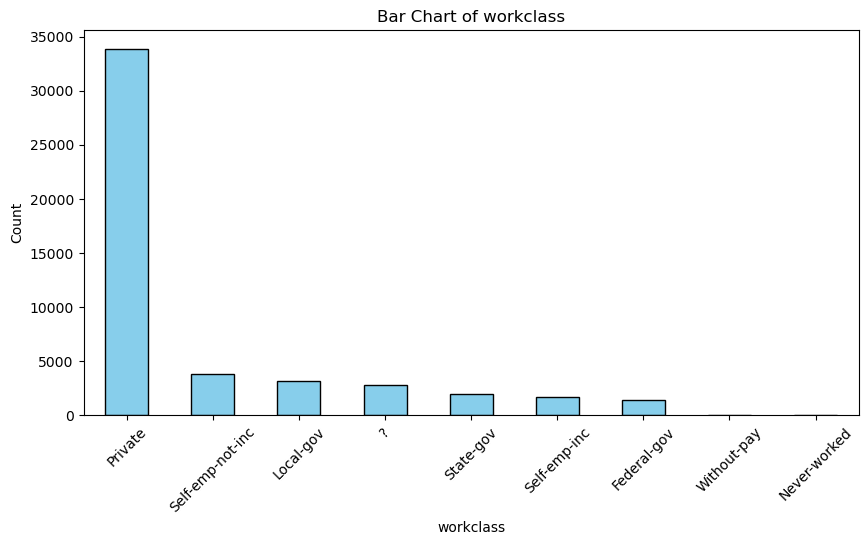

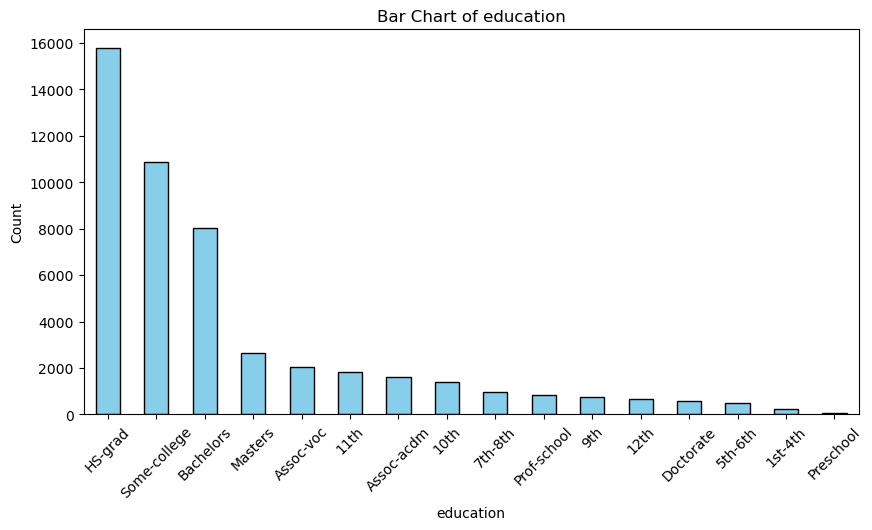

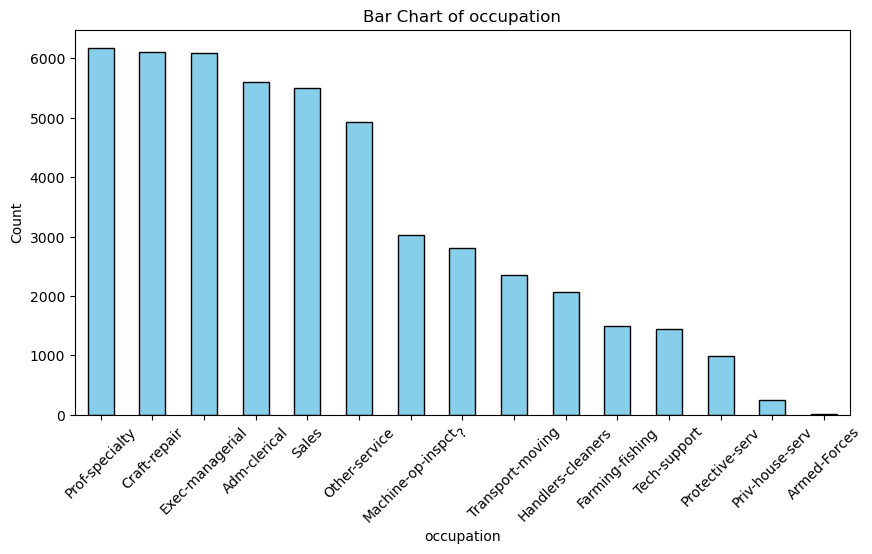

In [36]:
#Categorical (workclass,education, occupation) Bar Chart / Count Plot To show the frequency or count of each category.
import matplotlib.pyplot as plt

categorical_columns = ['workclass', 'education', 'occupation']

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


In [ ]:
#Bivariat and Multivariate Analysis

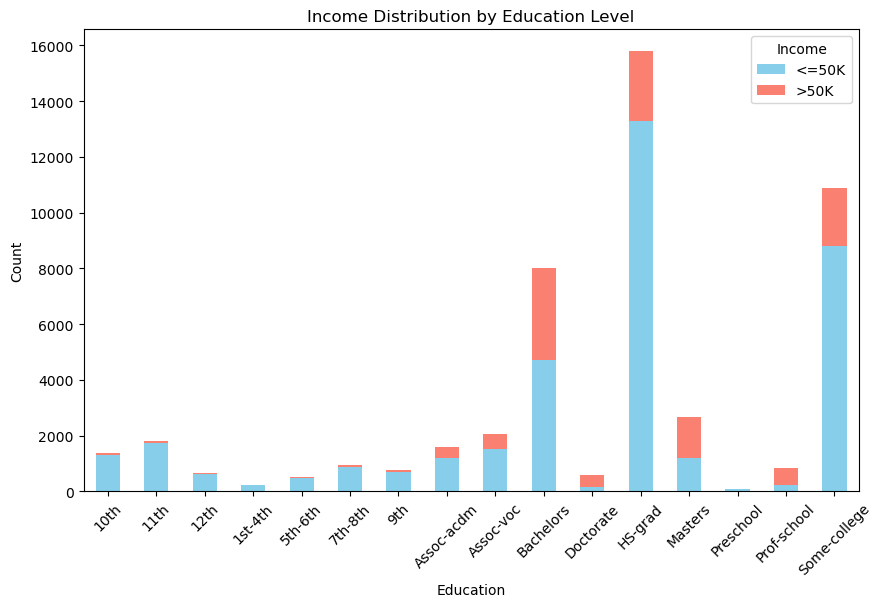

In [37]:
#Categorical vs. Target(education vs. income) Stacked Bar Chart / Percentage Bar Chart To see the proportion of >$50K within each education level.
import pandas as pd
import matplotlib.pyplot as plt
edu_income = pd.crosstab(df['education'], df['income'])

# Plot stacked bar chart
edu_income.plot(kind='bar', stacked=True, figsize=(10,6), color=['skyblue', 'salmon'])
plt.title('Income Distribution by Education Level')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()


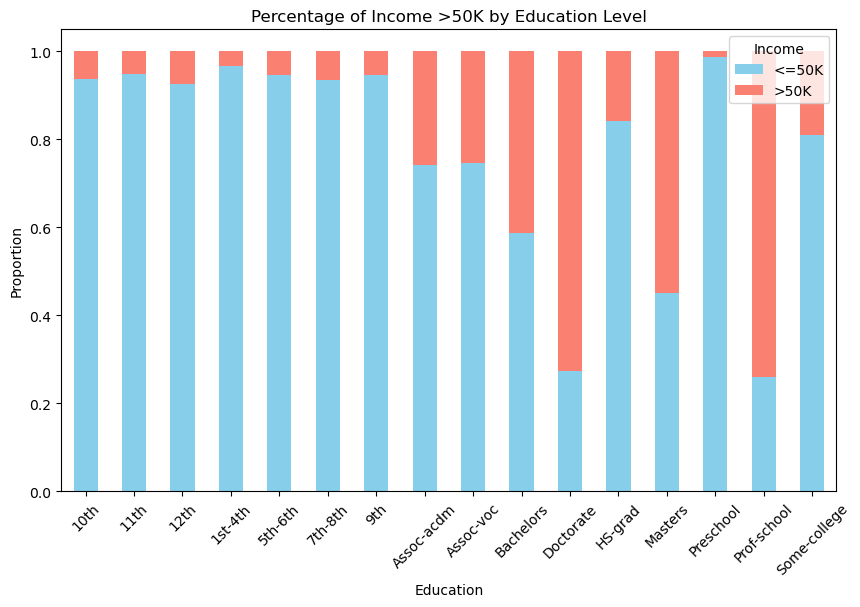

In [38]:
#percentile bar
# Convert counts to percentages
edu_income_percent = edu_income.div(edu_income.sum(axis=1), axis=0)

# Plot percentage stacked bar chart
edu_income_percent.plot(kind='bar', stacked=True, figsize=(10,6), color=['skyblue', 'salmon'])
plt.title('Percentage of Income >50K by Education Level')
plt.xlabel('Education')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()


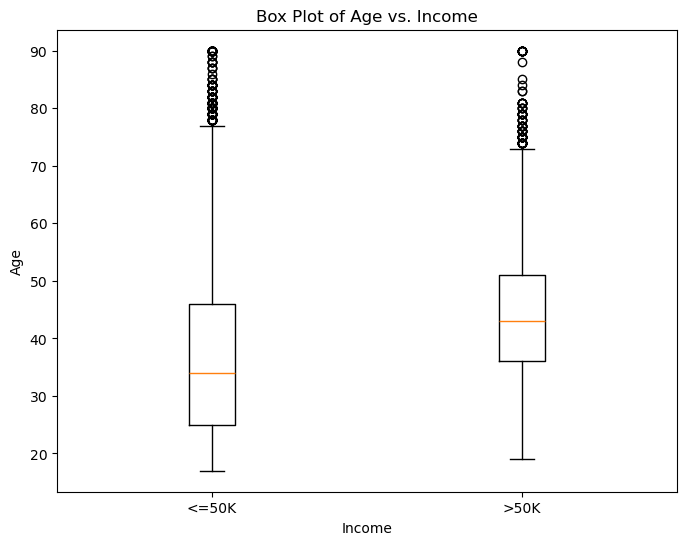

In [8]:
#Numerical vs. Target (age vs. income) Box Plot or Violin Plot To compare the distribution of age across the two income groups.
import matplotlib.pyplot as plt

# Split ages based on income groups
age_low = df[df["income"] == "<=50K"]["age"]
age_high = df[df["income"] == ">50K"]["age"]

plt.figure(figsize=(8,6))
plt.boxplot([age_low, age_high], tick_labels=["<=50K", ">50K"])
plt.title("Box Plot of Age vs. Income")
plt.xlabel("Income")
plt.ylabel("Age")
plt.show()


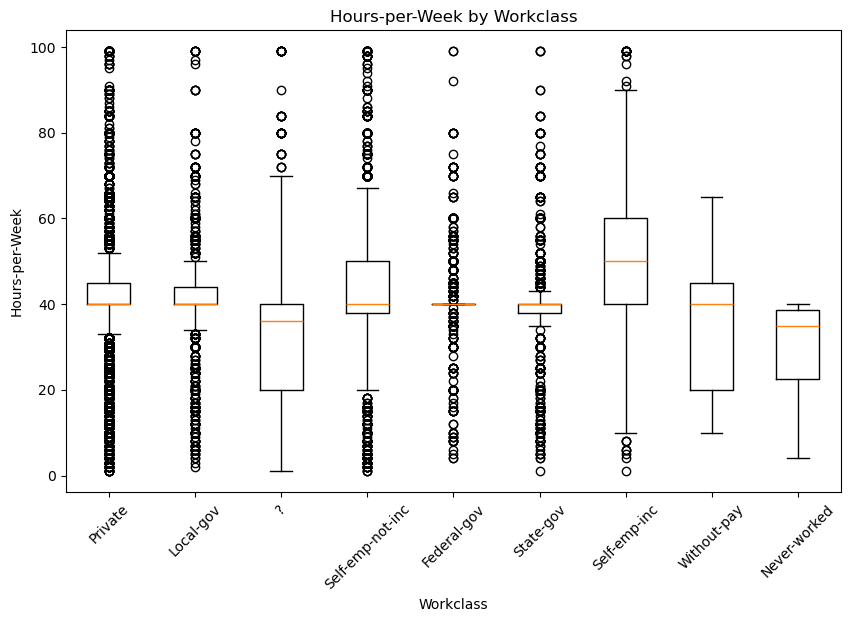

In [9]:
#Categorical vs. Numerical (workclass vs. hours-per- week) Box Plot or Violin Plot To compare the median hours-per-week for different employment types.
import matplotlib.pyplot as plt
categories = df["workclass"].unique()

groups = [df[df["workclass"] == cat]["hours-per-week"] for cat in categories]

plt.figure(figsize=(10,6))
plt.boxplot(groups, tick_labels=categories)
plt.title("Hours-per-Week by Workclass")
plt.xlabel("Workclass")
plt.ylabel("Hours-per-Week")
plt.xticks(rotation=45)
plt.show()


In [ ]:
lt.figure(figsize=(10,6))
plt.violinplot(groups, showmeans=True, showmedians=True)
plt.xticks(range(1, len(labels)+1), labels, rotation=45)
plt.title("Violin Plot of Hours-per-Week by Workclass")
plt.xlabel("Workclass")
plt.ylabel("Hours-per-Week")
plt.show()

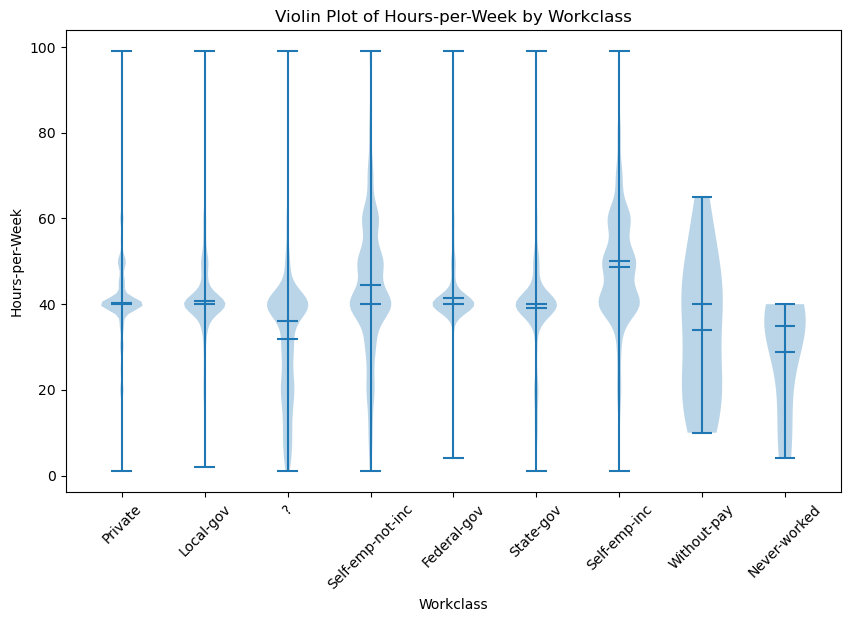

In [11]:

import matplotlib.pyplot as plt
labels = df["workclass"].unique()
groups = [df[df["workclass"] == cat]["hours-per-week"] for cat in labels]

# Violin plot
plt.figure(figsize=(10,6))
plt.violinplot(groups, showmeans=True, showmedians=True)
plt.xticks(range(1, len(labels)+1), labels, rotation=45)
plt.title("Violin Plot of Hours-per-Week by Workclass")
plt.xlabel("Workclass")
plt.ylabel("Hours-per-Week")
plt.show()


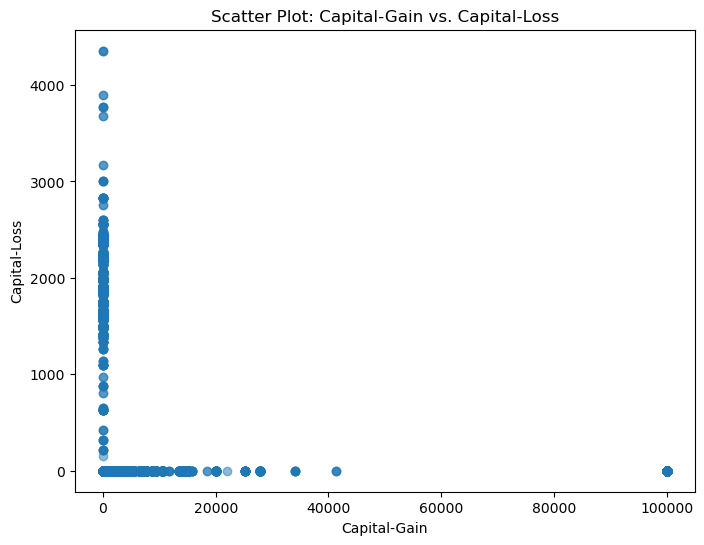

In [12]:
#Numerical vs. Numerical (capital-gain vs. capital-loss) Scatter Plot To check for a relationship or pattern between the two capital features.
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df["capital-gain"], df["capital-loss"], alpha=0.5)  # alpha for transparency
plt.title("Scatter Plot: Capital-Gain vs. Capital-Loss")
plt.xlabel("Capital-Gain")
plt.ylabel("Capital-Loss")
plt.show()


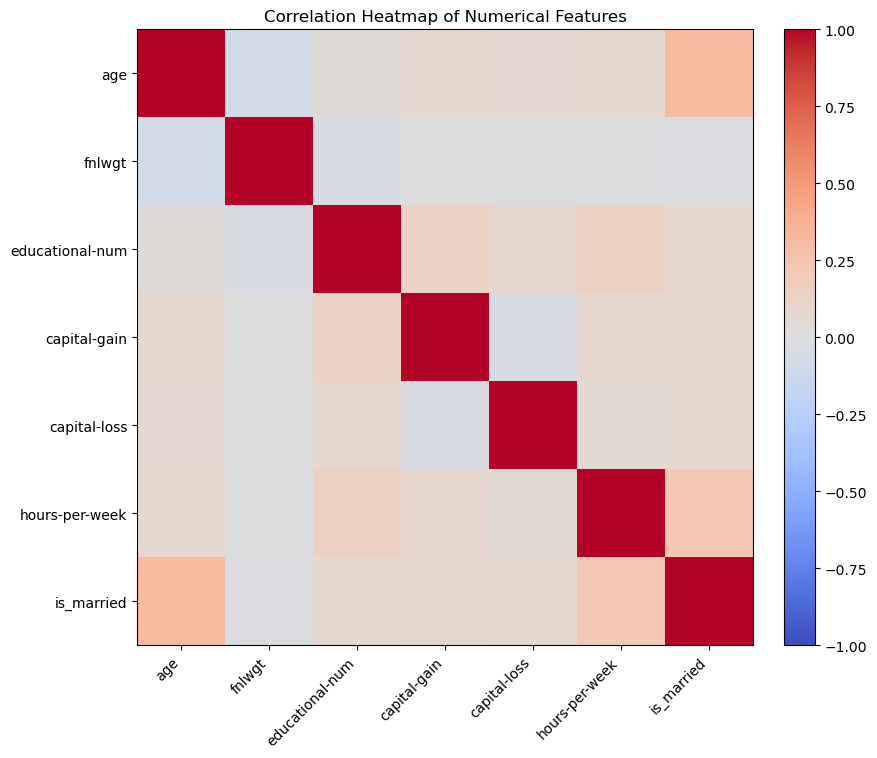

In [13]:
#Correlation (All numerical features) Heatmap (of the correlation matrix) To visualize the linear correlation coefficients between numerical variables.
import matplotlib.pyplot as plt
import numpy as np

# Select only numerical columns
num_df = df.select_dtypes(include=["int64", "float64"])

# Correlation matrix
corr = num_df.corr()

plt.figure(figsize=(10,8))
im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)

# Add color bar
plt.colorbar(im, fraction=0.046, pad=0.04)

# Show labels
plt.xticks(ticks=np.arange(len(corr.columns)), labels=corr.columns, rotation=45, ha="right")
plt.yticks(ticks=np.arange(len(corr.columns)), labels=corr.columns)

plt.title("Correlation Heatmap of Numerical Features")
plt.show()


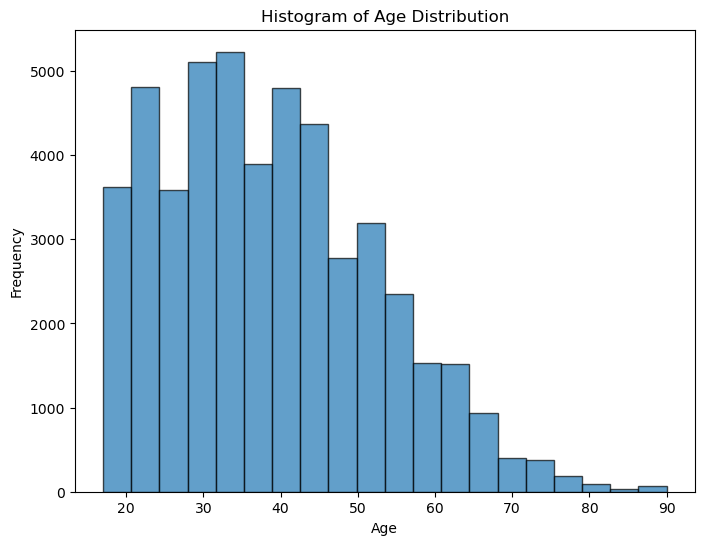

In [14]:
#Univariate Analysis

# Histogram of age distribution.
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(df["age"], bins=20, edgecolor="black", alpha=0.7)
plt.title("Histogram of Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


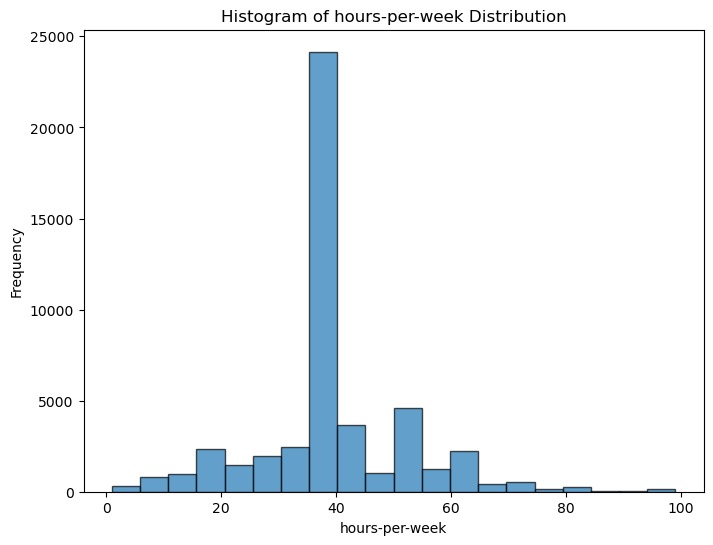

In [16]:
#Histogram of hours-per-week distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(df["hours-per-week"], bins=20, edgecolor="black", alpha=0.7)
plt.title("Histogram of hours-per-week Distribution")
plt.xlabel("hours-per-week")
plt.ylabel("Frequency")
plt.show()


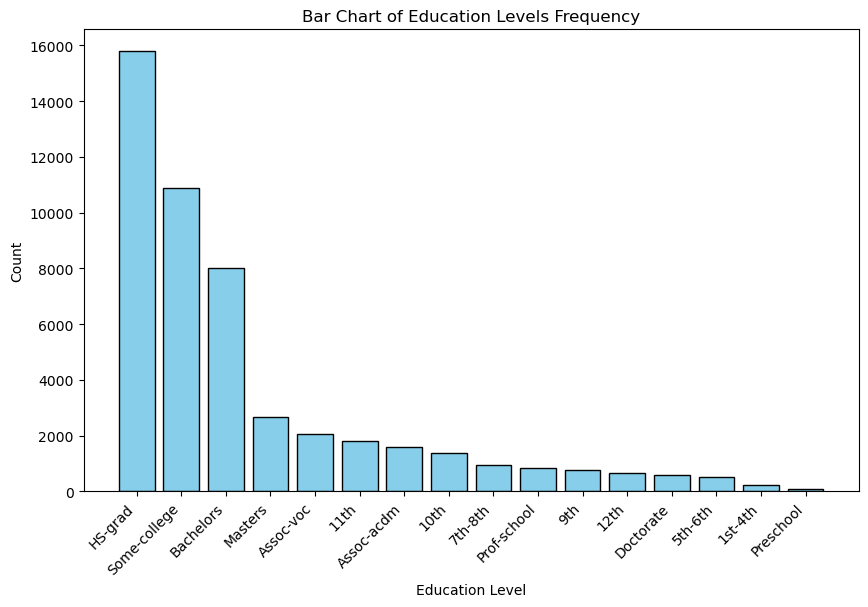

In [17]:
#· Bar chart of education levels frequency
import matplotlib.pyplot as plt

# Count frequency of each education level
edu_counts = df["education"].value_counts()

plt.figure(figsize=(10,6))
plt.bar(edu_counts.index, edu_counts.values, color="skyblue", edgecolor="black")
plt.title("Bar Chart of Education Levels Frequency")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")  # rotate labels for readability
plt.show()


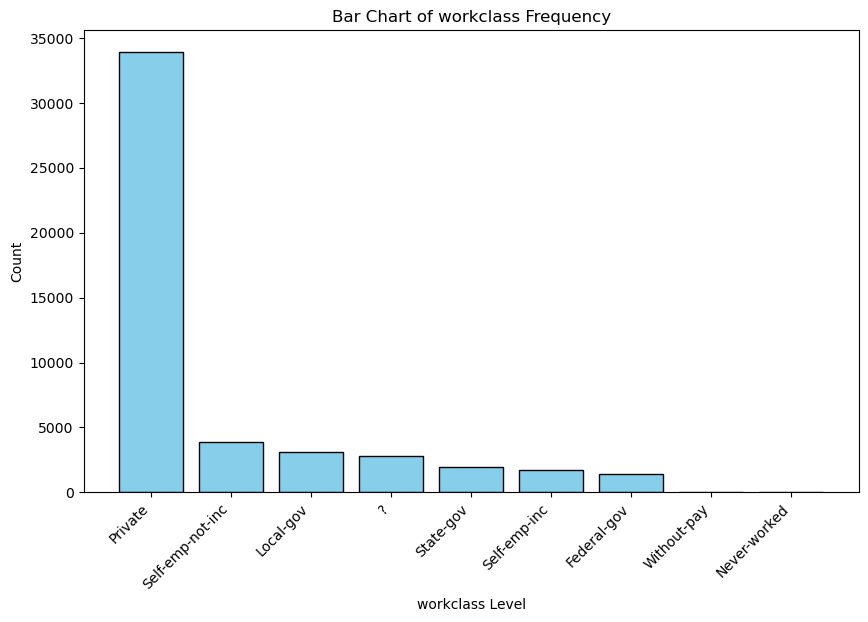

In [18]:
#Bar chart of workclass categories.
workclass_counts = df["workclass"].value_counts()

plt.figure(figsize=(10,6))
plt.bar(workclass_counts.index, workclass_counts.values, color="skyblue", edgecolor="black")
plt.title("Bar Chart of workclass Frequency")
plt.xlabel("workclass Level")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")  # rotate labels for readability
plt.show()

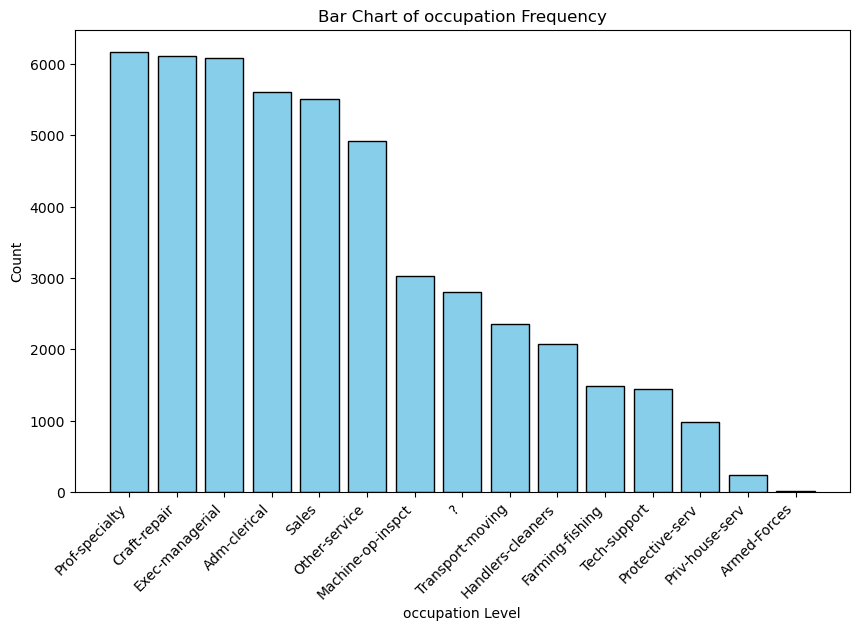

In [19]:
#Bar chart of occupation categories.
occupation_counts = df["occupation"].value_counts()

plt.figure(figsize=(10,6))
plt.bar(occupation_counts.index, occupation_counts.values, color="skyblue", edgecolor="black")
plt.title("Bar Chart of occupation Frequency")
plt.xlabel("occupation Level")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")  # rotate labels for readability
plt.show()

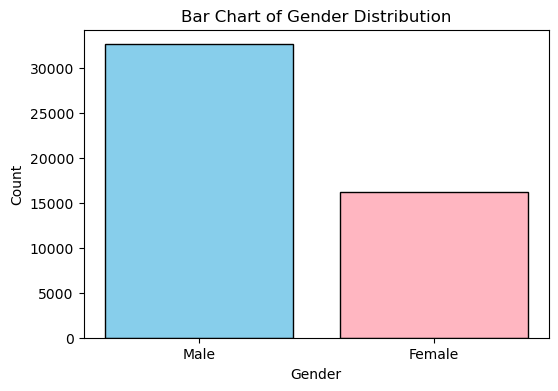

In [20]:
#Pie chart or bar chart of gender distribution
import matplotlib.pyplot as plt

gender_counts = df["gender"].value_counts()

plt.figure(figsize=(6,4))
plt.bar(gender_counts.index, gender_counts.values, color=["skyblue", "lightpink"], edgecolor="black")
plt.title("Bar Chart of Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


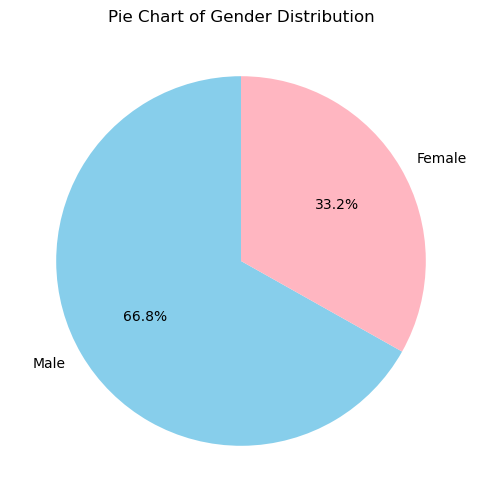

In [21]:
#pie chart
plt.figure(figsize=(6,6))
plt.pie(
    gender_counts.values,
    labels=gender_counts.index,
    autopct="%.1f%%",
    colors=["skyblue", "lightpink"],
    startangle=90
)
plt.title("Pie Chart of Gender Distribution")
plt.show()


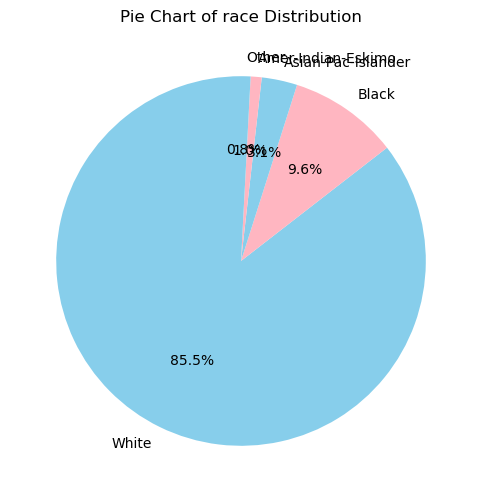

In [23]:
#· Pie chart of race distribution
race_counts = df["race"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    race_counts.values,
    labels=race_counts.index,
    autopct="%.1f%%",
    colors=["skyblue", "lightpink"],
    startangle=90
)
plt.title("Pie Chart of race Distribution")
plt.show()


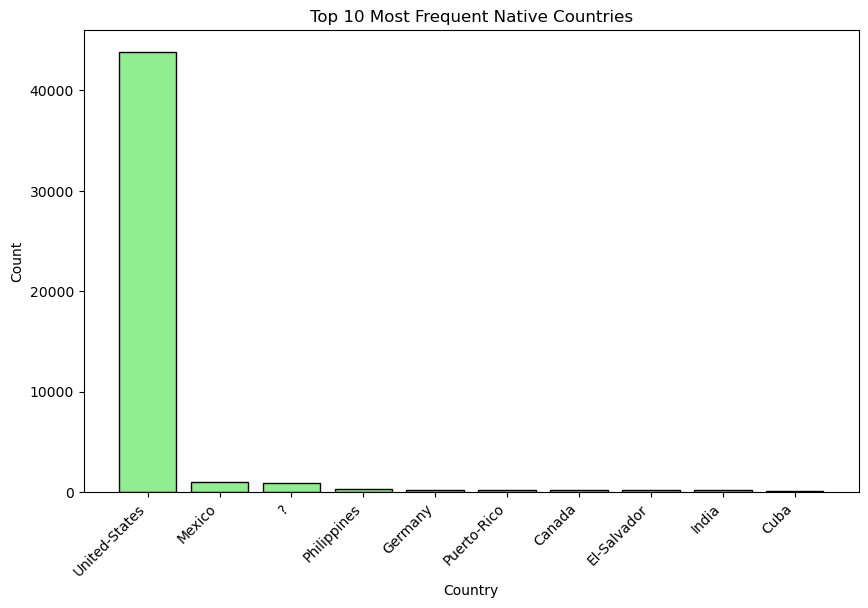

In [26]:
#Bar chart of native-country (top 10 most frequent countries)
import matplotlib.pyplot as plt
country_counts = df["native-country"].value_counts().head(10)

plt.figure(figsize=(10,6))
plt.bar(country_counts.index, country_counts.values, color="lightgreen", edgecolor="black")
plt.title("Top 10 Most Frequent Native Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")  # rotate labels for readability
plt.show()


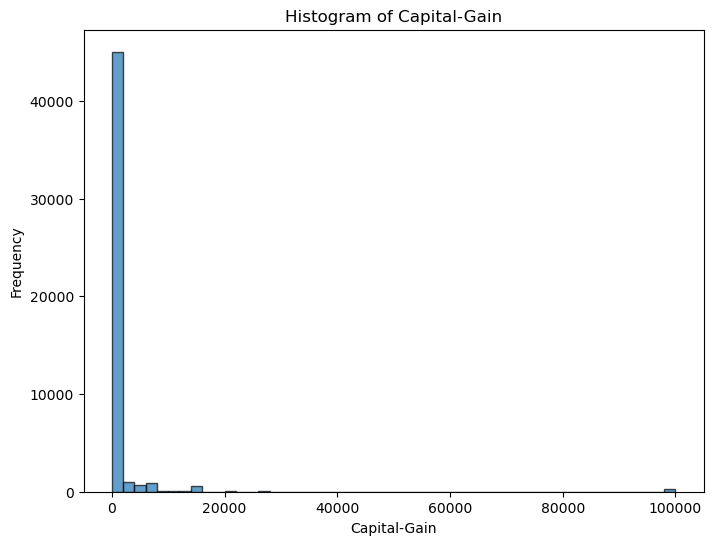

In [27]:
#· Histogram of capital-gain and capital-loss values.
#for capital gain
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(df["capital-gain"], bins=50, edgecolor="black", alpha=0.7)
plt.title("Histogram of Capital-Gain")
plt.xlabel("Capital-Gain")
plt.ylabel("Frequency")
plt.show()


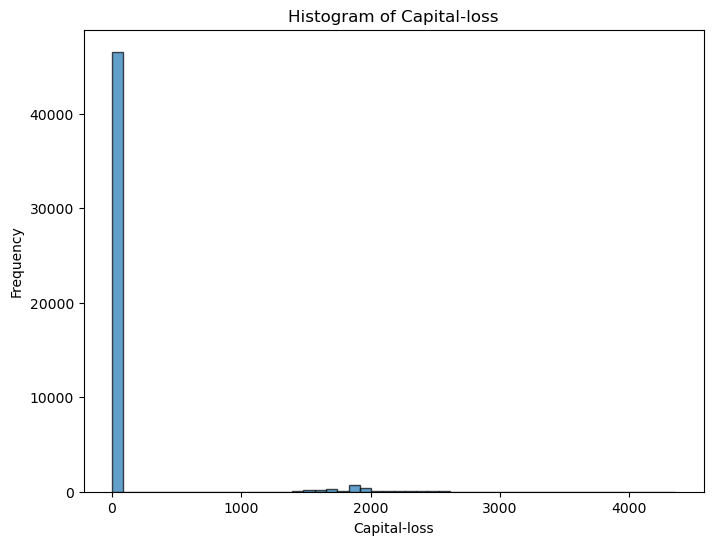

In [28]:
#capital loss
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(df["capital-loss"], bins=50, edgecolor="black", alpha=0.7)
plt.title("Histogram of Capital-loss")
plt.xlabel("Capital-loss")
plt.ylabel("Frequency")
plt.show()


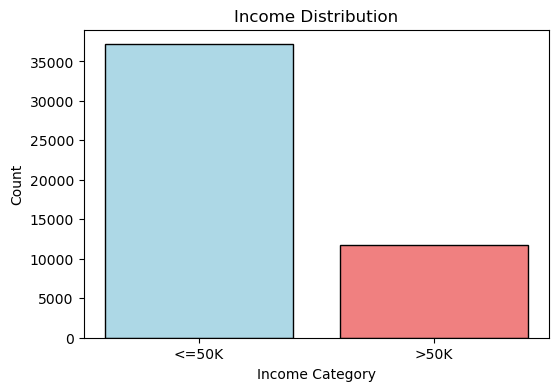

In [29]:
#Countplot of income distribution (<=50K vs >50K).
import matplotlib.pyplot as plt

income_counts = df["income"].value_counts()

plt.figure(figsize=(6,4))
plt.bar(income_counts.index, income_counts.values, color=["lightblue", "lightcoral"], edgecolor="black")
plt.title("Income Distribution")
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.show()


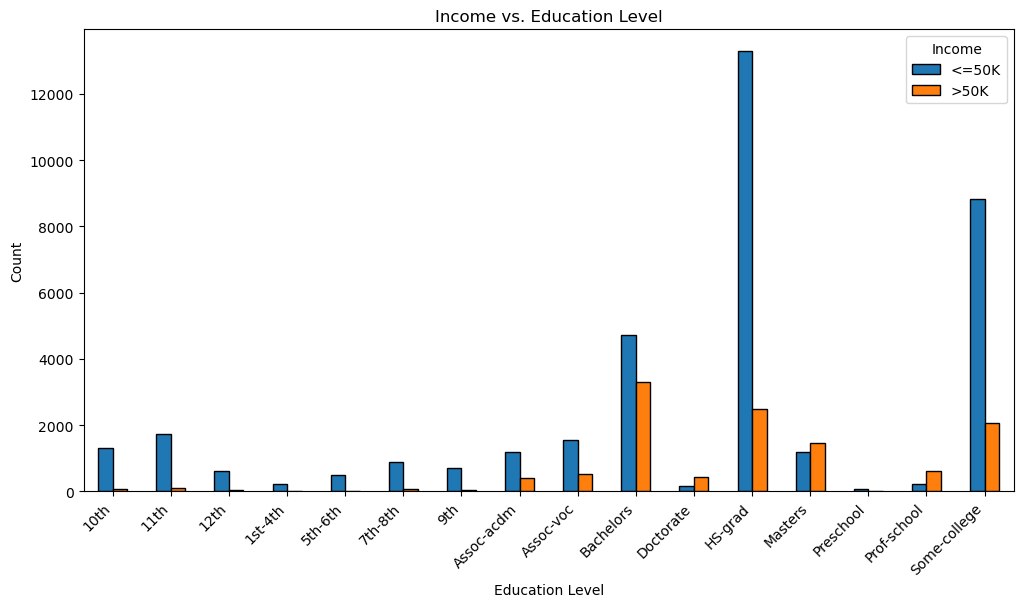

In [30]:
#Bivariate Analysis with Target (income)

# Bar plot: income vs education level
import matplotlib.pyplot as plt
edu_income = pd.crosstab(df["education"], df["income"])

# Plot as grouped bar chart
edu_income.plot(kind="bar", figsize=(12,6), edgecolor="black")

plt.title("Income vs. Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Income")
plt.show()


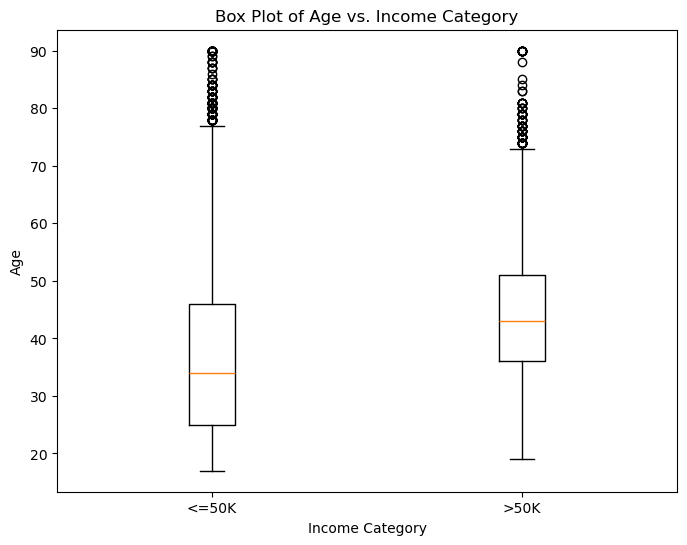

In [31]:
#Box plot: age vs income category.(repeated)
import matplotlib.pyplot as plt

age_low = df[df["income"] == "<=50K"]["age"]
age_high = df[df["income"] == ">50K"]["age"]

plt.figure(figsize=(8,6))
plt.boxplot([age_low, age_high], tick_labels=["<=50K", ">50K"])
plt.title("Box Plot of Age vs. Income Category")
plt.xlabel("Income Category")
plt.ylabel("Age")
plt.show()


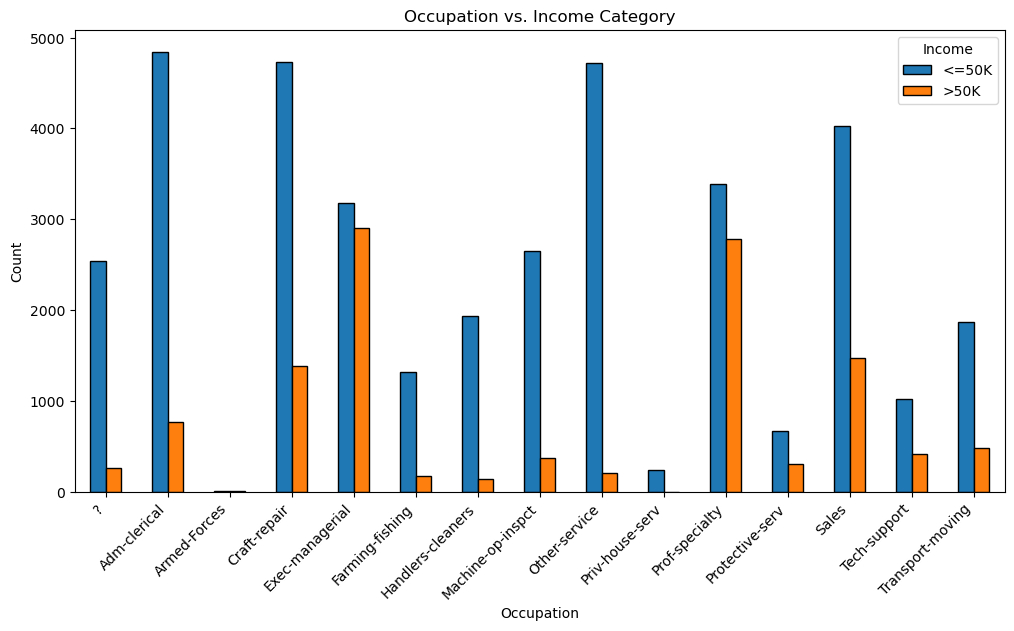

In [32]:
#Bar plot: occupation vs income category.
occ_income = pd.crosstab(df["occupation"], df["income"])

# Grouped bar chart
occ_income.plot(kind="bar", figsize=(12,6), edgecolor="black")

plt.title("Occupation vs. Income Category")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Income")
plt.show()

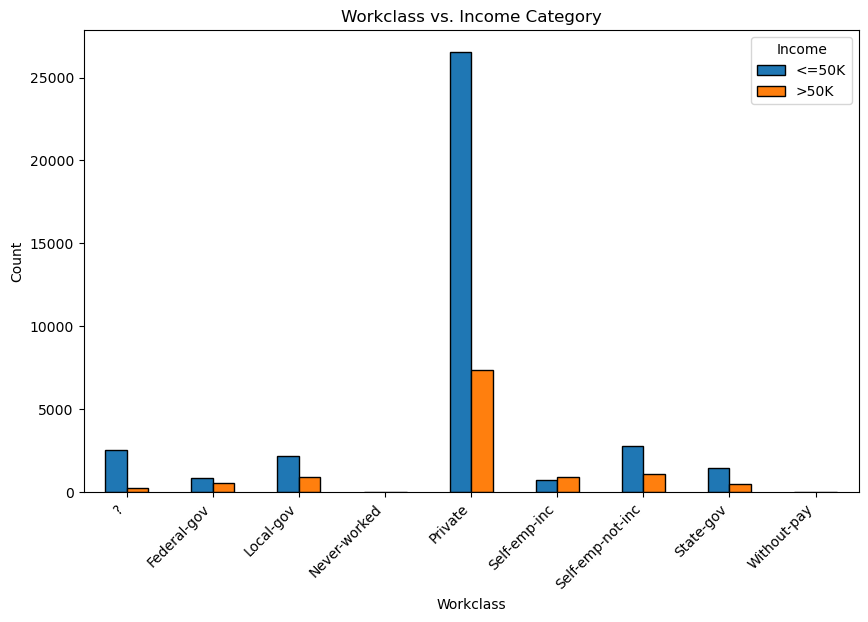

In [33]:
#Bar plot: workclass vs income category
wc_income = pd.crosstab(df["workclass"], df["income"])

# Grouped bar chart
wc_income.plot(kind="bar", figsize=(10,6), edgecolor="black")

plt.title("Workclass vs. Income Category")
plt.xlabel("Workclass")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Income")
plt.show()



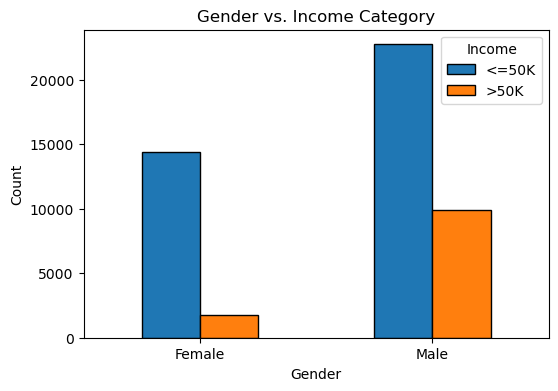

In [34]:
#Grouped bar chart: gender vs income
gender_income = pd.crosstab(df["gender"], df["income"])

# Grouped bar chart
gender_income.plot(kind="bar", figsize=(6,4), edgecolor="black")

plt.title("Gender vs. Income Category")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)  # keep labels horizontal
plt.legend(title="Income")
plt.show()


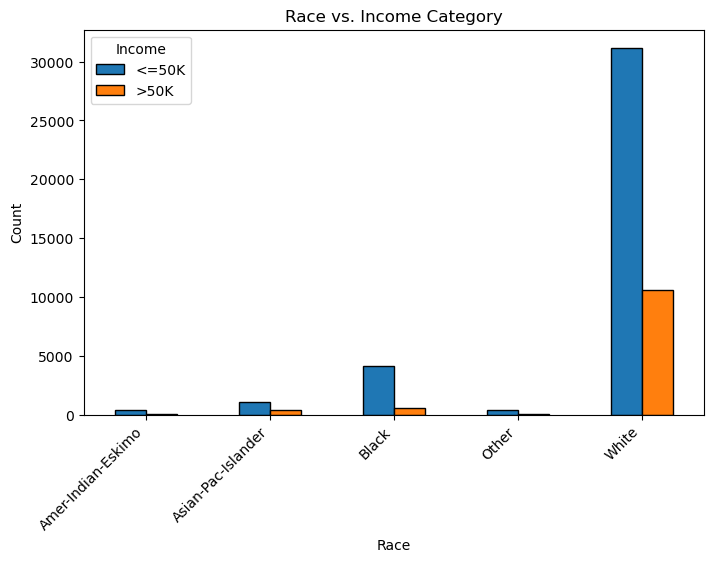

In [35]:
#Grouped bar chart: race vs income.
race_income = pd.crosstab(df["race"], df["income"])

# Grouped bar chart
race_income.plot(kind="bar", figsize=(8,5), edgecolor="black")

plt.title("Race vs. Income Category")
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Income")
plt.show()

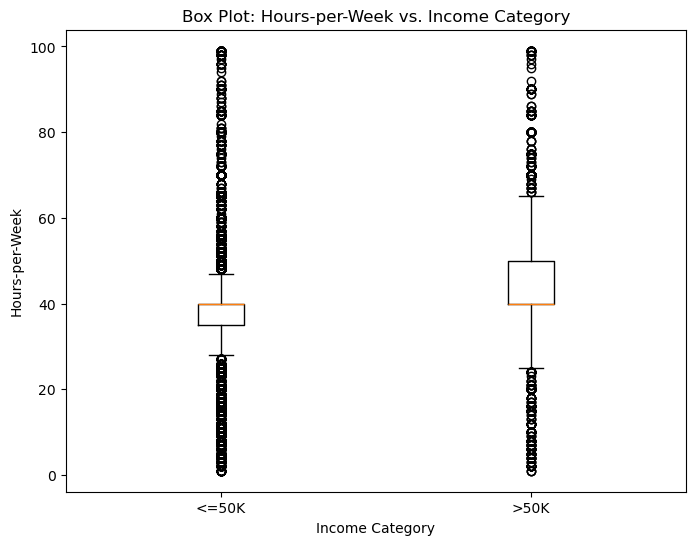

In [36]:
#Box plot: hours-per-week vs income.
hours_low = df[df["income"] == "<=50K"]["hours-per-week"]
hours_high = df[df["income"] == ">50K"]["hours-per-week"]

plt.figure(figsize=(8,6))
plt.boxplot([hours_low, hours_high], tick_labels=["<=50K", ">50K"])
plt.title("Box Plot: Hours-per-Week vs. Income Category")
plt.xlabel("Income Category")
plt.ylabel("Hours-per-Week")
plt.show()

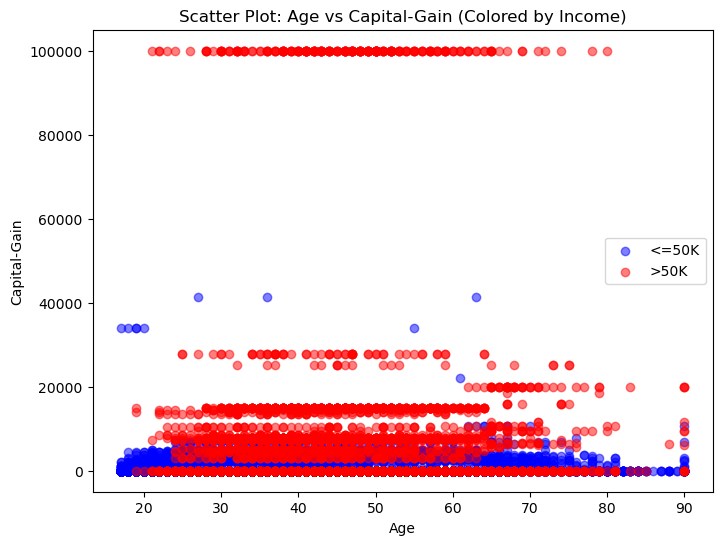

In [37]:
#Scatter plot: age vs capital-gain, colored by income
low_income = df[df["income"] == "<=50K"]
high_income = df[df["income"] == ">50K"]

plt.figure(figsize=(8,6))
plt.scatter(low_income["age"], low_income["capital-gain"],
            color="blue", alpha=0.5, label="<=50K")
plt.scatter(high_income["age"], high_income["capital-gain"],
            color="red", alpha=0.5, label=">50K")

plt.title("Scatter Plot: Age vs Capital-Gain (Colored by Income)")
plt.xlabel("Age")
plt.ylabel("Capital-Gain")
plt.legend()
plt.show()


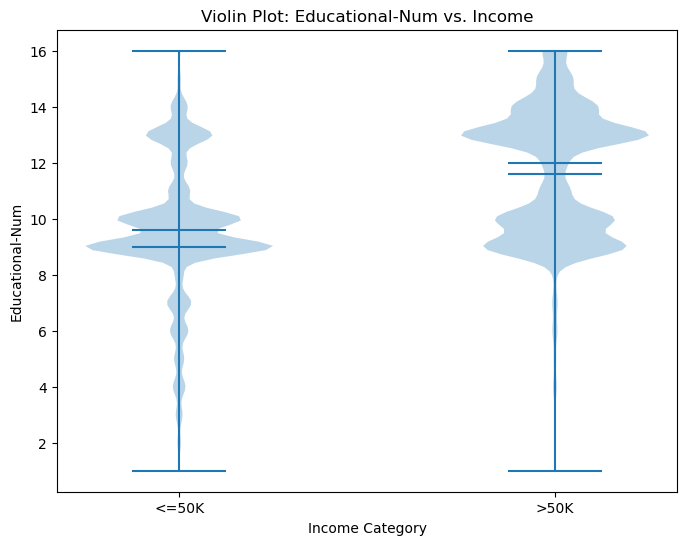

In [38]:
#Violin plot: educational-num vs income
edu_low = df[df["income"] == "<=50K"]["educational-num"]
edu_high = df[df["income"] == ">50K"]["educational-num"]

plt.figure(figsize=(8,6))
plt.violinplot([edu_low, edu_high], showmeans=True, showmedians=True)
plt.xticks([1, 2], ["<=50K", ">50K"])
plt.title("Violin Plot: Educational-Num vs. Income")
plt.xlabel("Income Category")
plt.ylabel("Educational-Num")
plt.show()


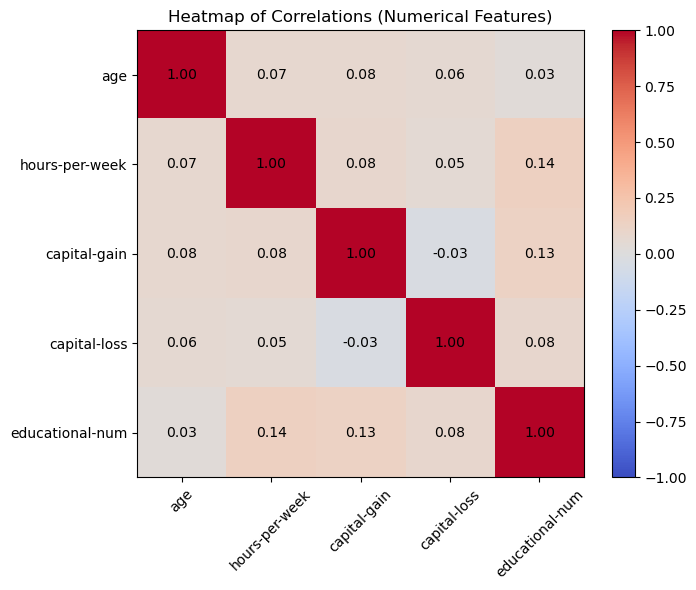

In [39]:
#Heatmap of correlations among numerical features (age, hours-per-week, capital-gain, capital-loss, educational-num).
num_cols = ["age", "hours-per-week", "capital-gain", "capital-loss", "educational-num"]
corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)

# Add colorbar
plt.colorbar(im, fraction=0.046, pad=0.04)

# Add labels
plt.xticks(range(len(num_cols)), num_cols, rotation=45)
plt.yticks(range(len(num_cols)), num_cols)

# Add correlation values
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha="center", va="center", color="black")

plt.title("Heatmap of Correlations (Numerical Features)")
plt.tight_layout()
plt.show()

In [ ]:
#Pair plot of numerical features colored by income category


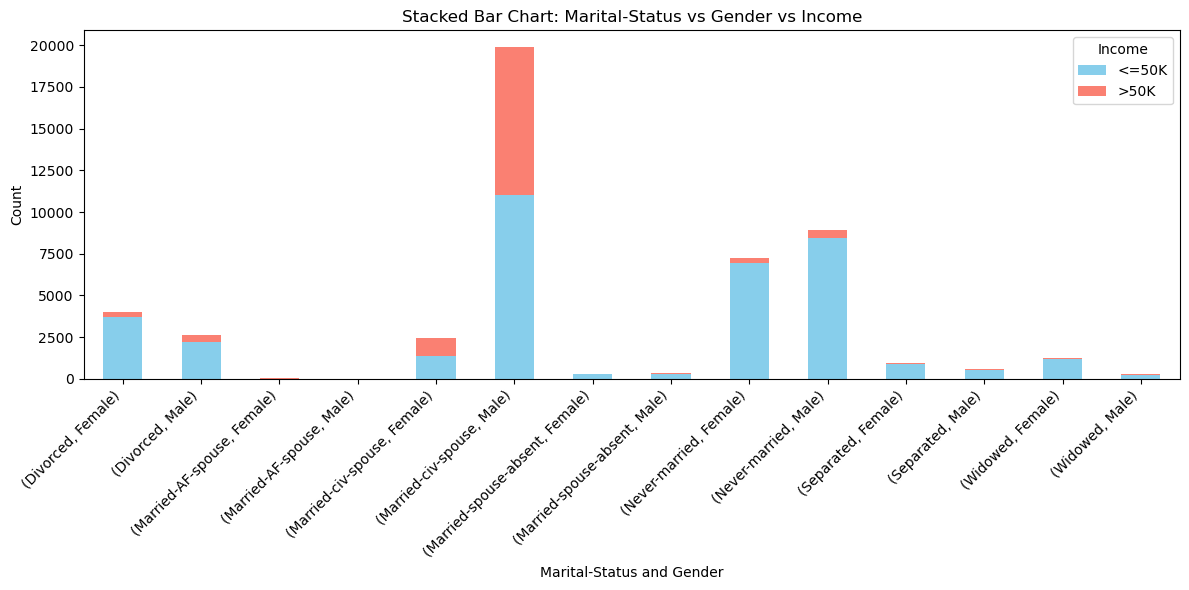

In [40]:
#Stacked bar chart: marital-status vs gender vs income.
cross = pd.crosstab(
    [df["marital-status"], df["gender"]], 
    df["income"]
)

# Ensure both income categories appear
cross = cross[["<=50K", ">50K"]]

# Plot stacked bar chart
cross.plot(kind="bar", stacked=True, figsize=(12,6), color=["skyblue", "salmon"])

plt.title("Stacked Bar Chart: Marital-Status vs Gender vs Income")
plt.xlabel("Marital-Status and Gender")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Income")
plt.tight_layout()
plt.show()

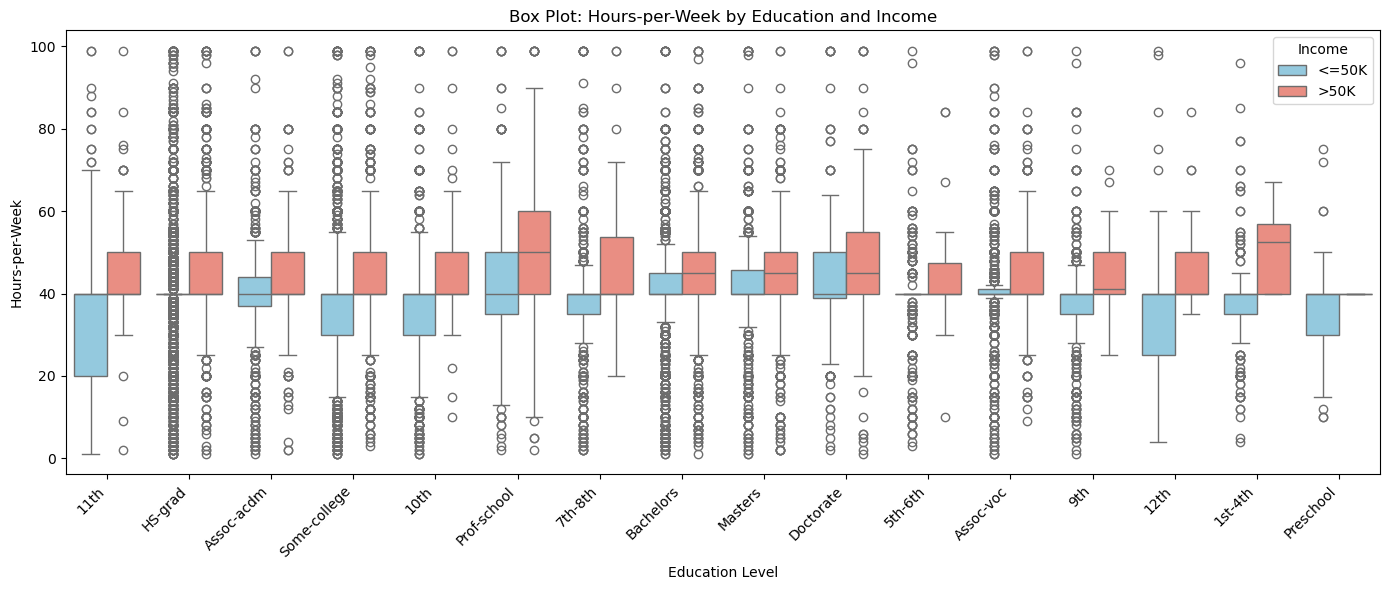

In [41]:
#Box plot: hours-per-week grouped by education and colored by income.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
sns.boxplot(
    data=df,
    x="education",
    y="hours-per-week",
    hue="income",
    palette={"<=50K": "skyblue", ">50K": "salmon"}
)

plt.title("Box Plot: Hours-per-Week by Education and Income")
plt.xlabel("Education Level")
plt.ylabel("Hours-per-Week")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Income")
plt.tight_layout()
plt.show()

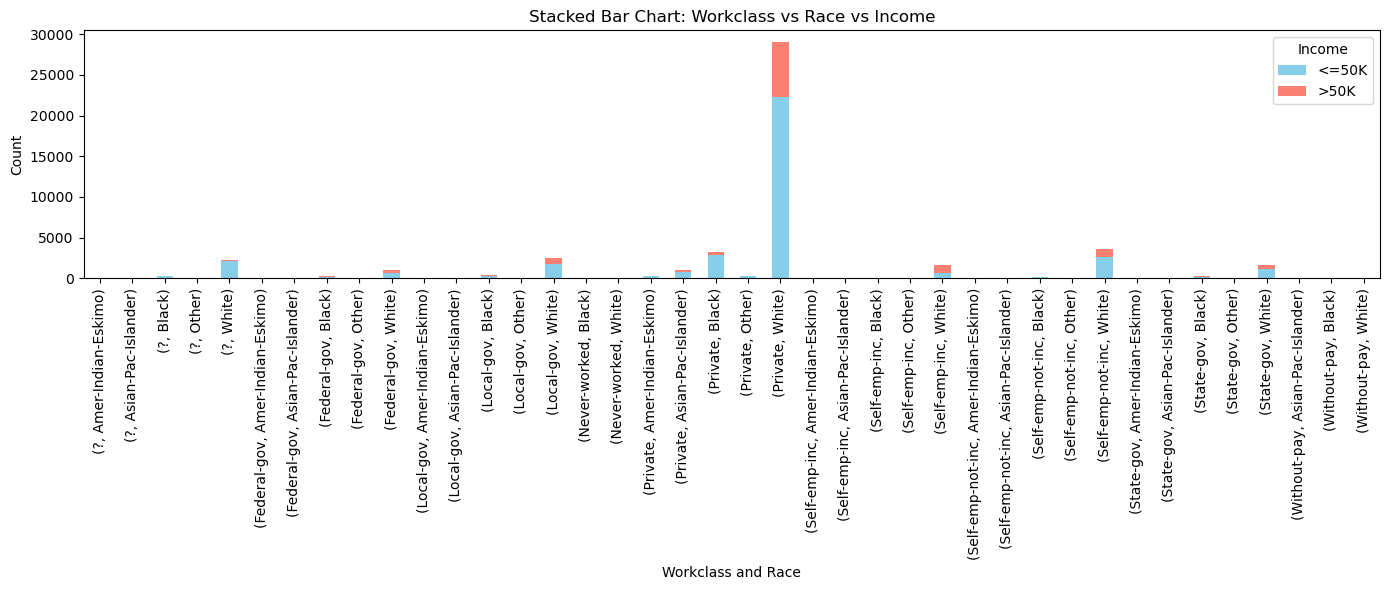

In [42]:
#Stacked bar chart: workclass vs race vs income
cross = pd.crosstab(
    [df["workclass"], df["race"]], 
    df["income"]
)

# Ensure consistent order of income categories
cross = cross[["<=50K", ">50K"]]

# Plot stacked bar chart
cross.plot(
    kind="bar",
    stacked=True,
    figsize=(14,6),
    color=["skyblue", "salmon"]
)

plt.title("Stacked Bar Chart: Workclass vs Race vs Income")
plt.xlabel("Workclass and Race")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Income")
plt.tight_layout()
plt.show()


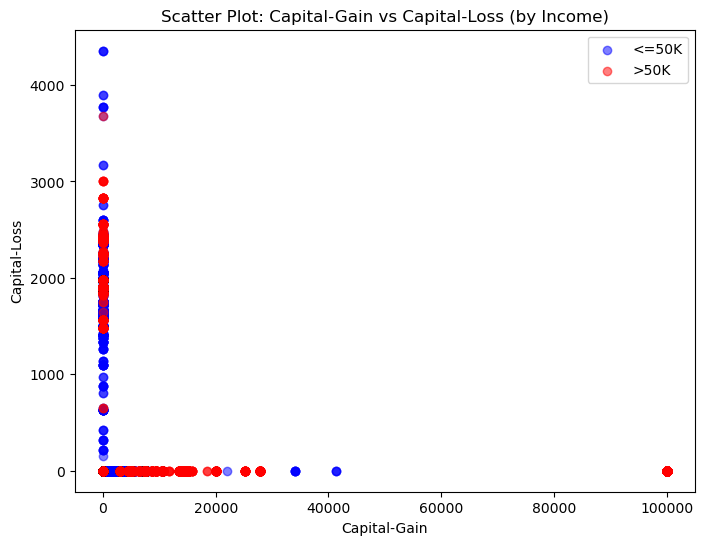

In [43]:
#Scatter plot: capital-gain vs capital-loss with income categories.
low_income = df[df["income"] == "<=50K"]
high_income = df[df["income"] == ">50K"]

plt.figure(figsize=(8,6))
plt.scatter(low_income["capital-gain"], low_income["capital-loss"],
            color="blue", alpha=0.5, label="<=50K")
plt.scatter(high_income["capital-gain"], high_income["capital-loss"],
            color="red", alpha=0.5, label=">50K")

plt.title("Scatter Plot: Capital-Gain vs Capital-Loss (by Income)")
plt.xlabel("Capital-Gain")
plt.ylabel("Capital-Loss")
plt.legend()
plt.show()

In [ ]:
#